This notebook compiles scripts used to identify coverage depth and mapping quality scores across MTB genomes.

All directories in ```/Users/yeemayseah/Documents/Repos/``` are located on unicorn at ```/molmicro/working/ymseah/```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO


Bad key savefig.frameon in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/yeemayseah/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

### ART synthetic reads
These are output from ```bedtools genomecov```. Per-base coverage obtained with ```-d``` flag.

In [80]:
perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)

In [3]:
snp_20003_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_20003_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_2000_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv2000snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_2000_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv2000snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_200_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv200snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_200_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv200snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_20_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_20_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)


In [81]:
perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)

In [82]:
hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

In [83]:
perbase_cov

0      pos  depth
0        NC_000962.3        1      0
1        NC_000962.3        2      0
2        NC_000962.3        3      0
3        NC_000962.3        4      0
4        NC_000962.3        5      0
...              ...      ...    ...
4411527  NC_000962.3  4411528      0
4411528  NC_000962.3  4411529      0
4411529  NC_000962.3  4411530      0
4411530  NC_000962.3  4411531      0
4411531  NC_000962.3  4411532      0

[4411532 rows x 3 columns]

In [6]:
hist_cov

0  depth  num_bases  genome_size  genome_fraction
0    NC_000962.3      0        106      4411532         0.000024
1    NC_000962.3      1        163      4411532         0.000037
2    NC_000962.3      2        125      4411532         0.000028
3    NC_000962.3      3        122      4411532         0.000028
4    NC_000962.3      4         55      4411532         0.000012
..           ...    ...        ...          ...              ...
157       genome     76         42      4411532         0.000010
158       genome     77         25      4411532         0.000006
159       genome     78         25      4411532         0.000006
160       genome     79          9      4411532         0.000002
161       genome     80          5      4411532         0.000001

[162 rows x 5 columns]

Text(0.5, 1.0, 'MTB REF')

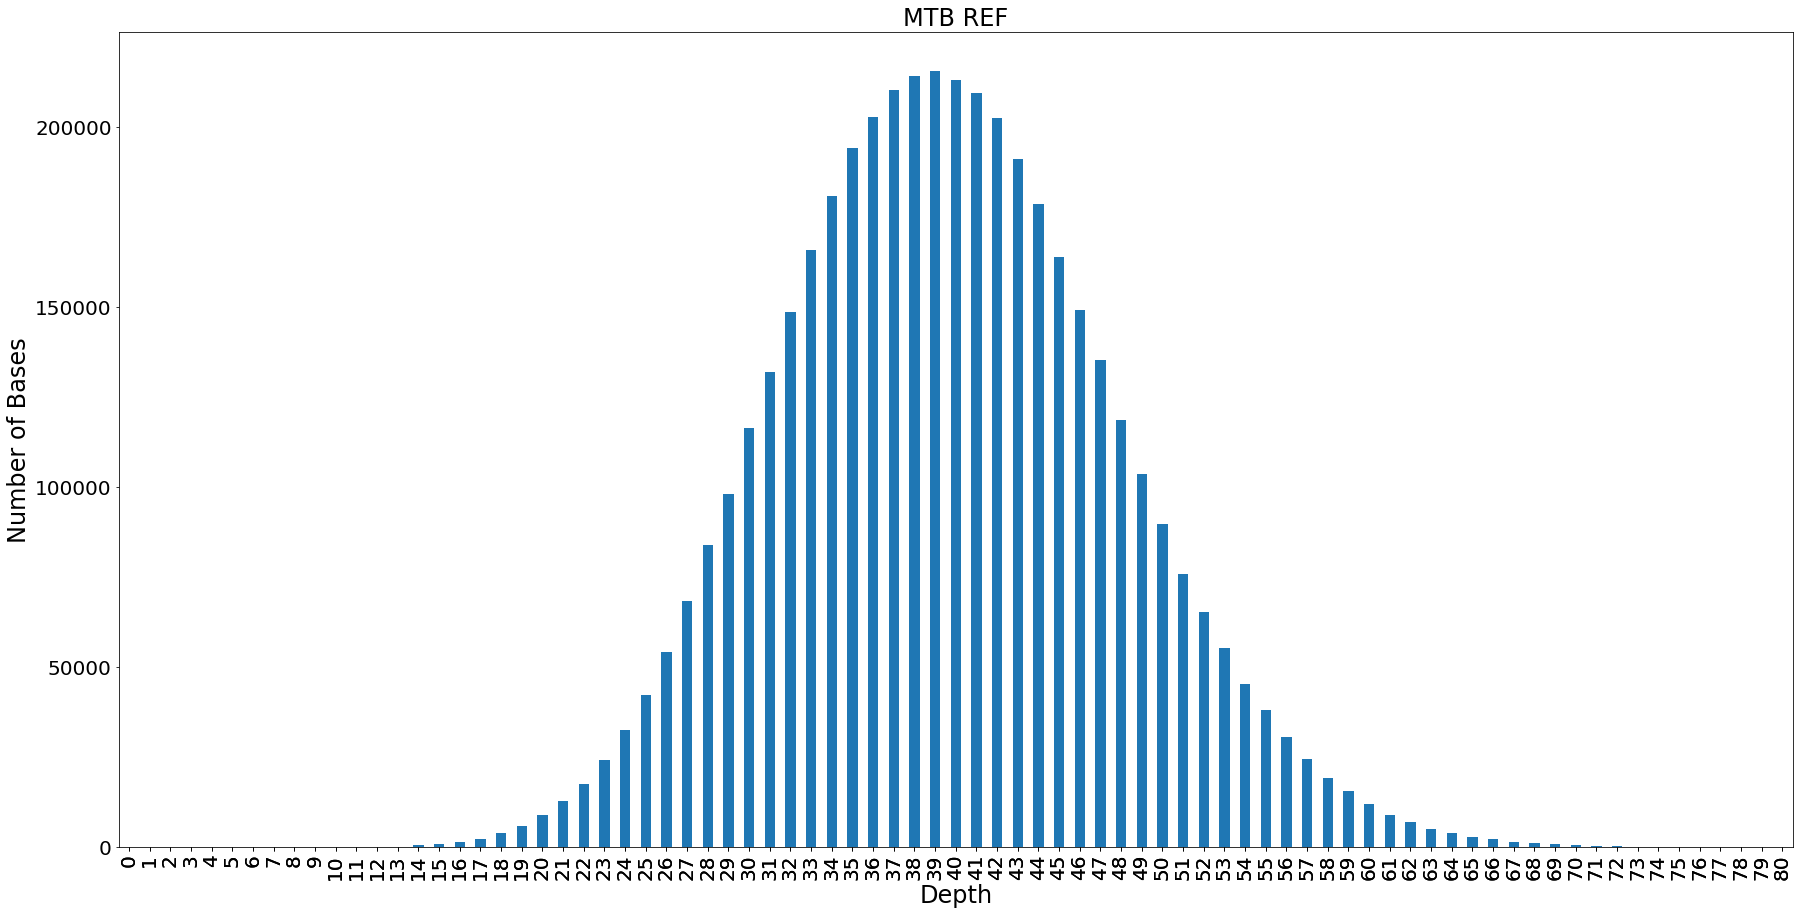

In [116]:
hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB REF', fontsize=24)

In [117]:
print('number of bases with depth <2: ', str(len(perbase_cov[perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(perbase_cov[perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(perbase_cov[perbase_cov['depth'] < 20])))

number of bases with depth <2:  269
number of bases with depth <10:  770
number of bases with depth <20:  16777


Text(0.5, 1.0, 'MTB 20003 SNPs')

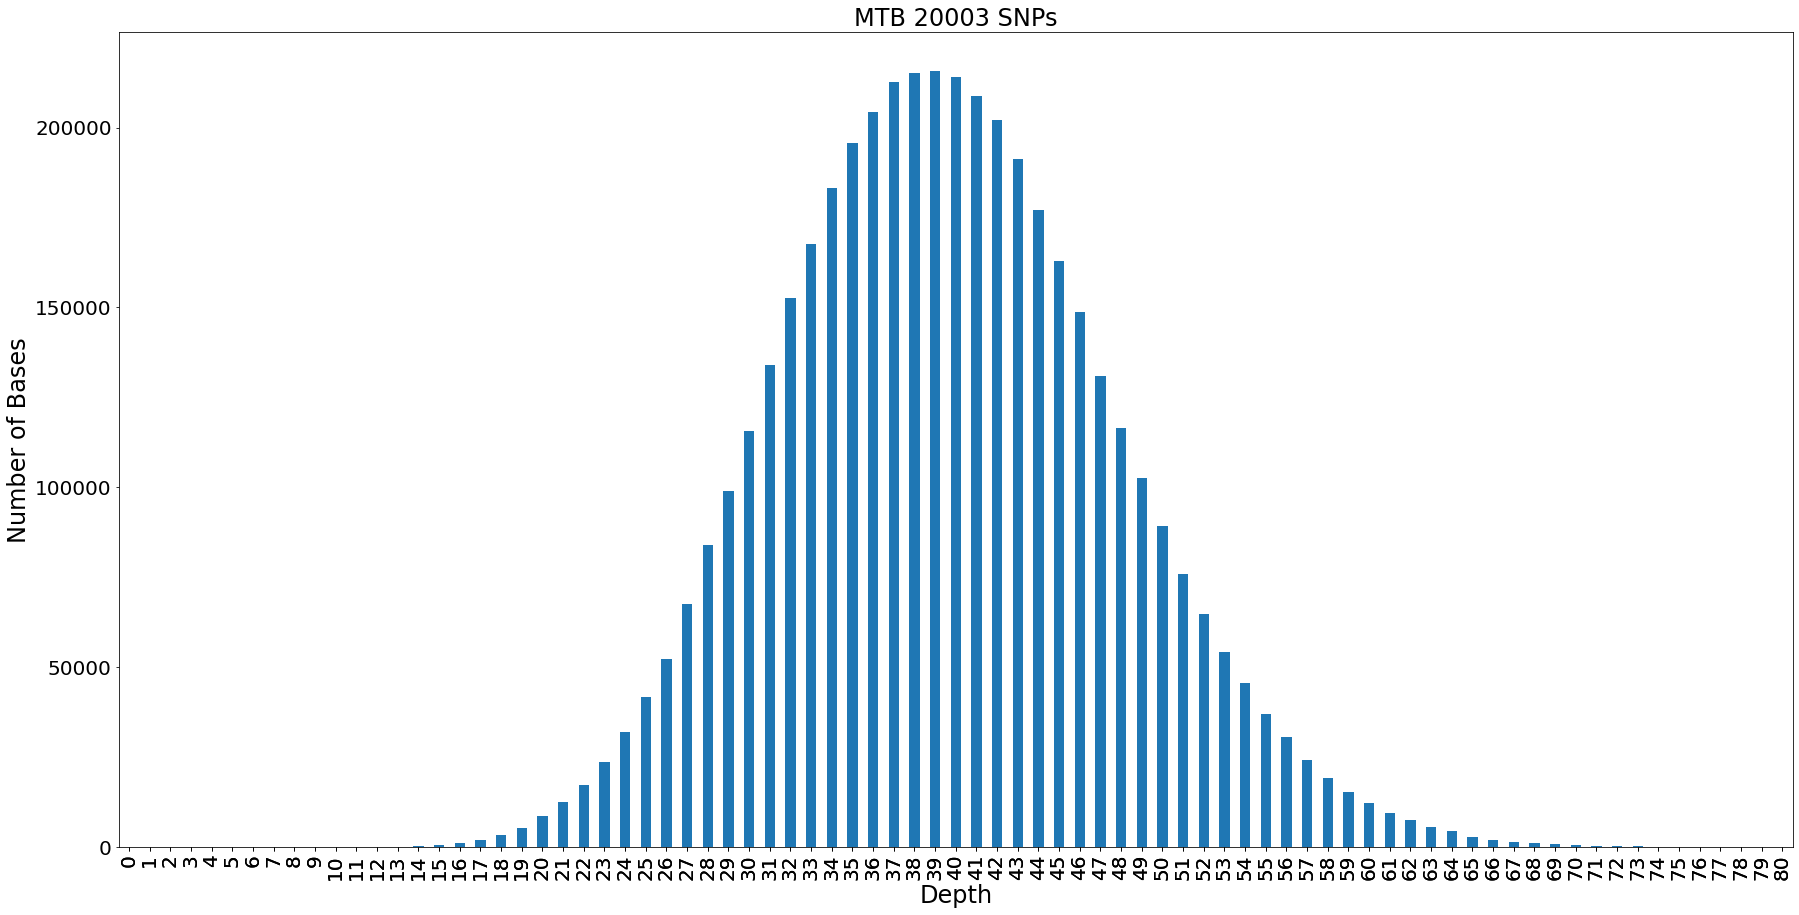

In [124]:
snp_20003_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_20003_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_20003_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 20003 SNPs', fontsize=24)

In [125]:
print('number of bases with depth <2: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 20])))

number of bases with depth <2:  204
number of bases with depth <10:  672
number of bases with depth <20:  15988


Text(0.5, 1.0, 'MTB 2000 SNPs')

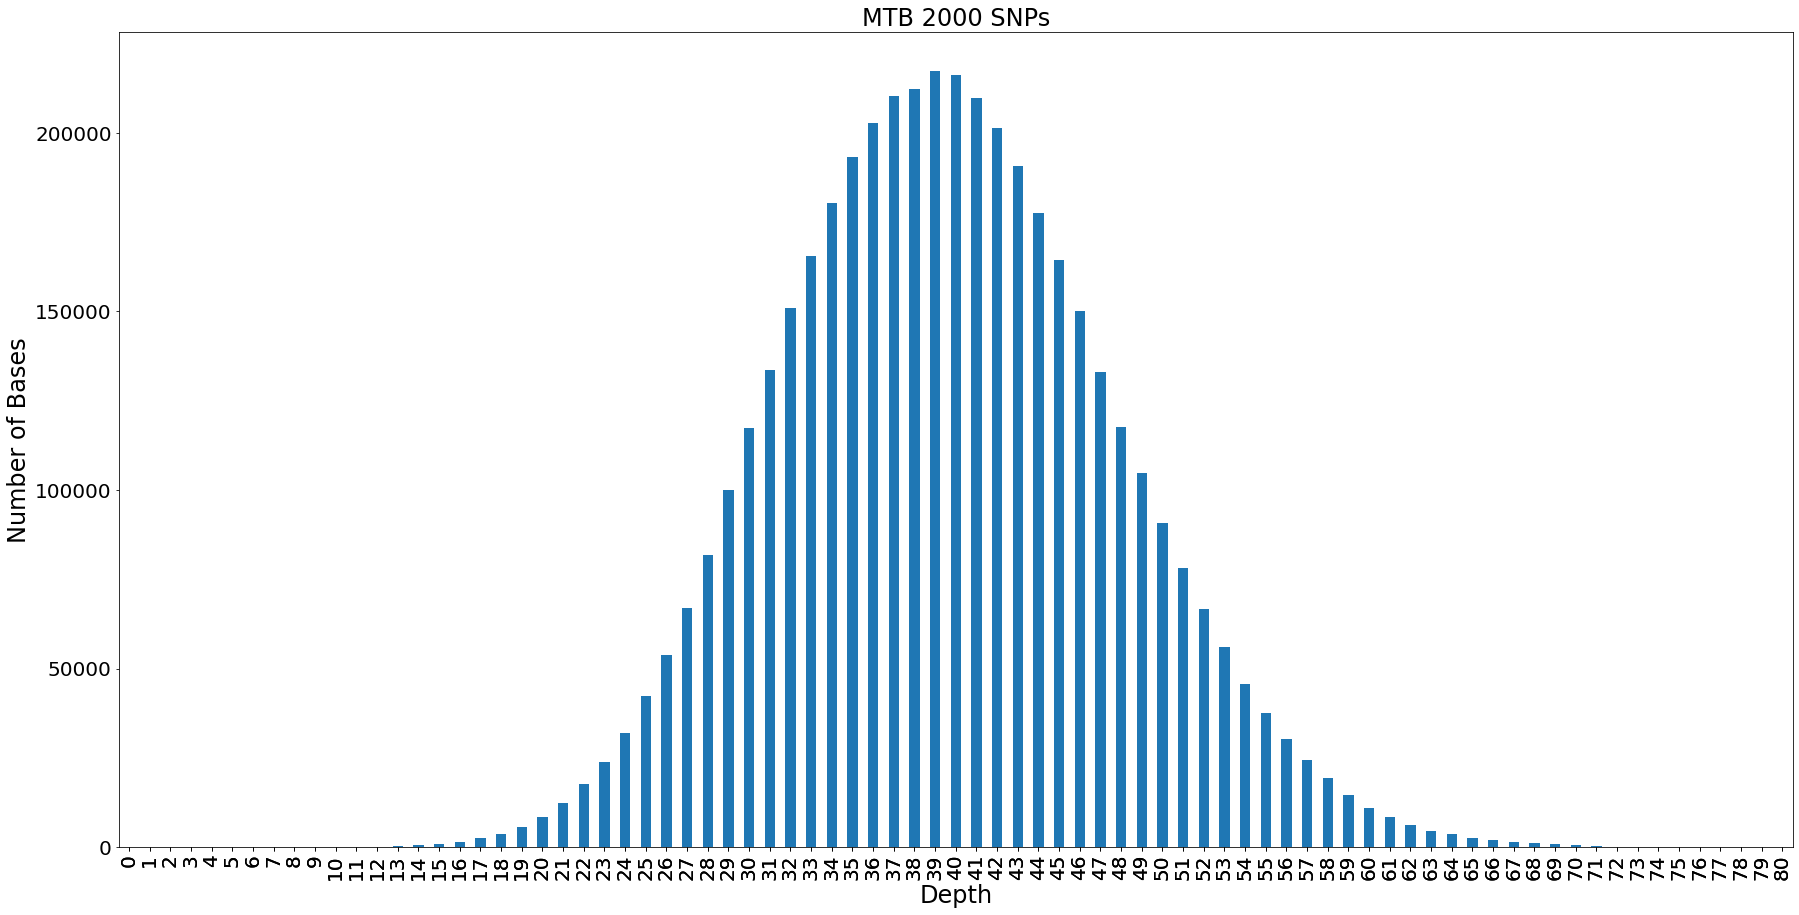

In [118]:
snp_2000_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_2000_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_2000_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 2000 SNPs', fontsize=24)

In [119]:
print('number of bases with depth <2: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 20])))

number of bases with depth <2:  204
number of bases with depth <10:  672
number of bases with depth <20:  15988


Text(0.5, 1.0, 'MTB 200 SNPs')

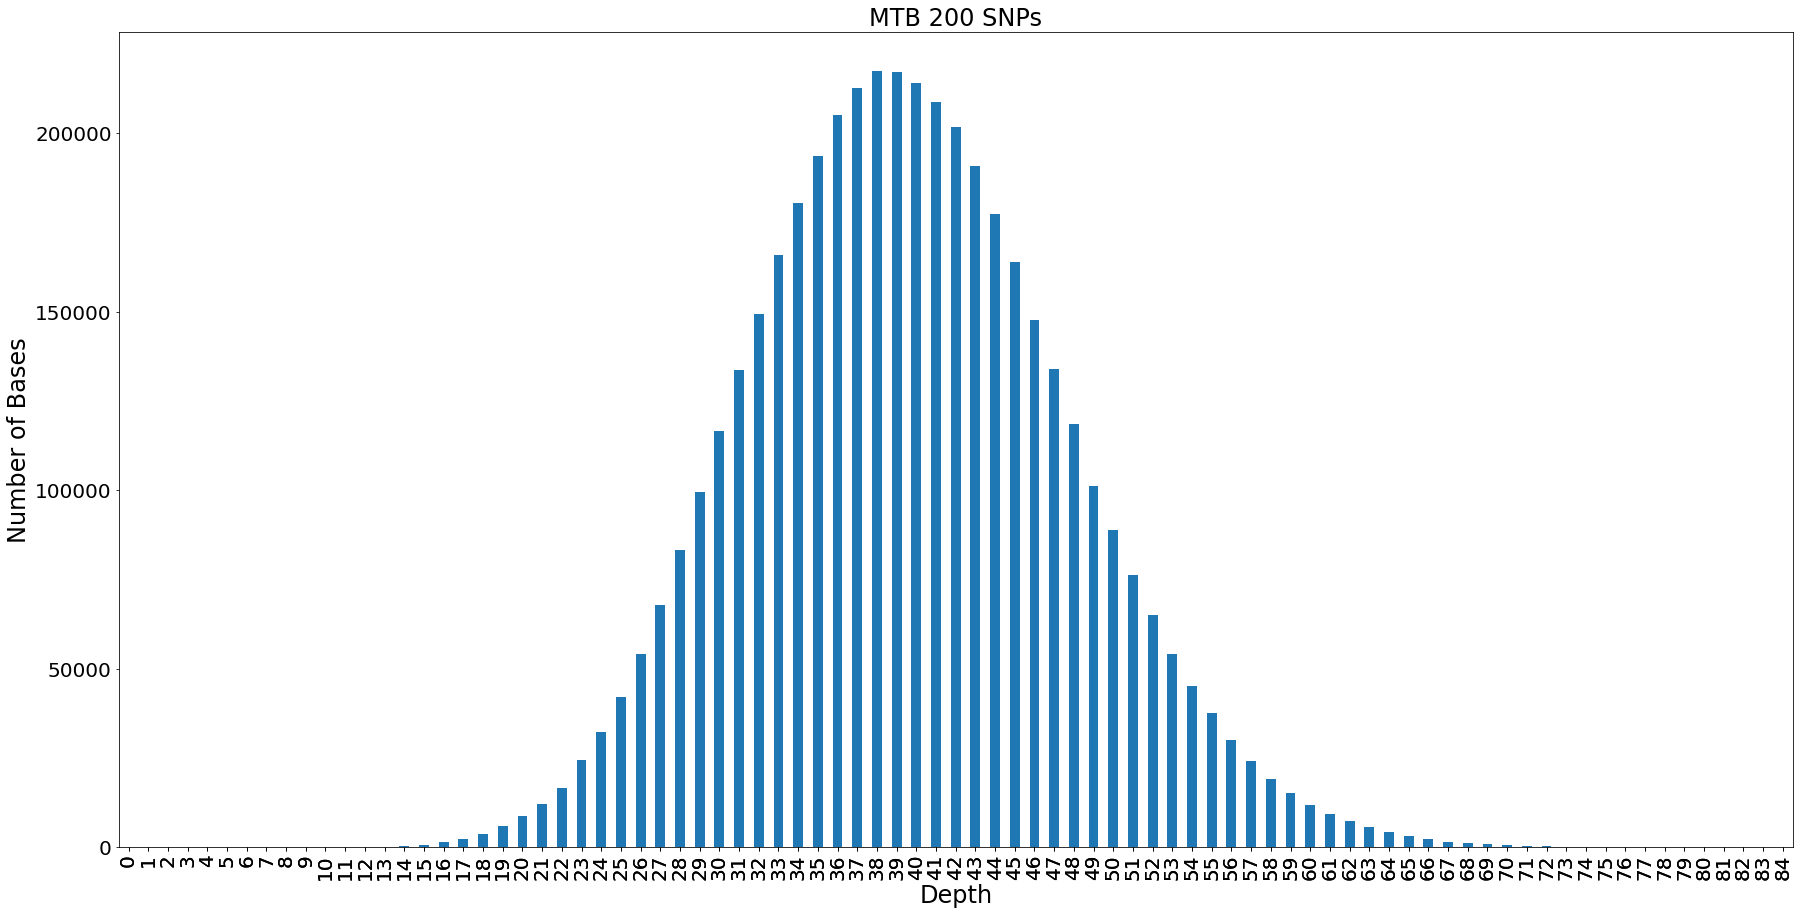

In [120]:
snp_200_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_200_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_200_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 200 SNPs', fontsize=24)

In [121]:
print('number of bases with depth <2: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 20])))

number of bases with depth <2:  252
number of bases with depth <10:  732
number of bases with depth <20:  15360


Text(0.5, 1.0, 'MTB 20 SNPs')

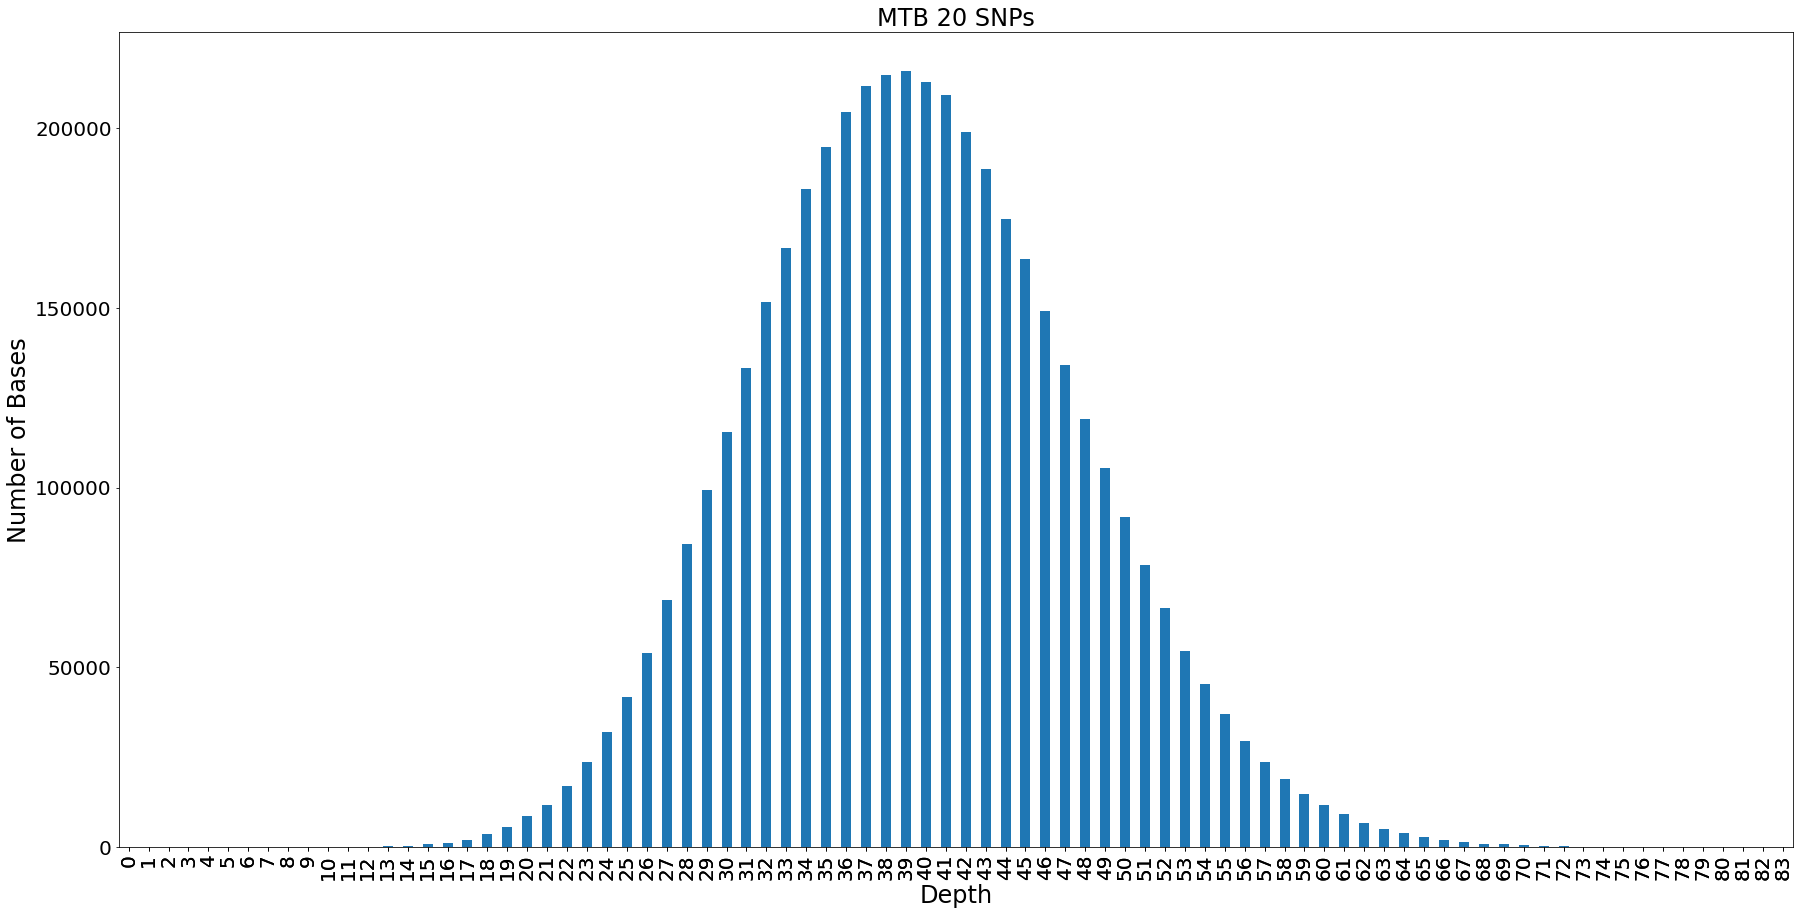

In [122]:
snp_20_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_20_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_20_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 20 SNPs', fontsize=24)

In [123]:
print('number of bases with depth <2: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 20])))

number of bases with depth <2:  238
number of bases with depth <10:  722
number of bases with depth <20:  15310


### SRA data

[SRR9166034: WGS of reference H37Rv](https://www.ncbi.nlm.nih.gov/sra/SRX5938805[accn])

In [109]:
srr9166034_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-SRR9166034-pe-sorted_perbase_genomecov.txt', sep='\t', header=None)
srr9166034_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-SRR9166034-pe-sorted_genomecov.txt', sep='\t', header=None)

In [111]:
srr9166034_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
srr9166034_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

srr9166034_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(300, 150), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'SRR9166034: MTb reference H37Rv WGS', fontsize=24)
plt.savefig('srr9166034_cov.png')

In [112]:
print('number of bases with depth <2: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 20])))

number of bases with depth <2:  2082
number of bases with depth <10:  6156
number of bases with depth <20:  11647


In [114]:
srr9166034_perbase_cov['depth'].max()

2984

In [115]:
srr9166034_perbase_cov['depth'].min()

0

In [116]:
srr9166034_perbase_cov['depth'].median()

311.0

### In-house sequencing

In [3]:
sub1089_710_517_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/sub1089-710-517-pe-sorted_perbase_genomecov.txt', sep='\t', header=None)
sub1089_710_517_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/sub1089-710-517-pe-sorted_genomecov.txt', sep='\t', header=None)

In [4]:
sub1089_710_517_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
sub1089_710_517_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

sub1089_710_517_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(300, 150), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'sub1089-710-517: Salipante lab Mtb ATCC strain WGS, subsampled 1.2 million reads', fontsize=24)
plt.savefig('sub1089_710_517_cov.png')

In [5]:
sub1089_710_517_perbase_cov['depth'].max()

255

In [6]:
sub1089_710_517_perbase_cov['depth'].min()

0

In [7]:
sub1089_710_517_perbase_cov['depth'].median()

71.0

### Plot MAPQ - H37Rv mapped to H37Rv
#### With ```.bed``` files

To get MAPQ at each position with ```bedtools```:

1. Create tab-separated genome file (mtb_genome.txt):

> NC_000962.3        4411532

2. Create window file (```-w``` for window size, ```-s``` for step size):

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools
makewindows -g /mnt/read_mapping/mtb_genome.txt -w 1 -s 1 > /mnt/read_mapping/bedtools/mtb_genome.windows1.bed```

3. Create ```.bed``` file from ```.bam```:

```singularity exec -B /molmicro,/molmicro/working/yms(mtb_amr_env) ymseah@unicorn:/molmicro/working/ymseah$ singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools bamtobed -i /mnt/deduped/picard/TEST-MTBREF_deduped_matecig.bam > read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed```

4. Map scores from ```.bed``` to window file. Default reports sum of scores:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed > read_mapping/bedtools/TEST-MTBREF.mapq.windows1.bed```

4a. Use with ```-o collapse``` to report all scores per site:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -o collapse > read_mapping/bedtools/TEST-MTBREF.mapq_collapse.windows1.bed```

OR

4b. Use with ```-o distinct``` to report only unique scores per site:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -o distinct > read_mapping/bedtools/TEST-MTBREF.mapq_distinct.windows1.bed```

OR

4c. Use with ```-c 5,5,5,5``` (which columns in ```-b``` to apply following calculations) and ```-o min,max,median,count``` to get summary stats:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -c 5,5,5,5 -o min,max,median,count > read_mapping/bedtools/TEST-MTBREF.mapq_stats.windows1.bed```

In [4]:
refmapq = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/bedtools/TEST-MTBREF.mapq_stats.windows1.bed', sep='\t', header=None)

/Users/yeemayseah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
refmapq.rename(columns={0:'chr', 1:'start', 2:'end', 3:'min_mapq', 4:'max_mapq', 5:'median_mapq', 6:'count_mapq'}, inplace=True)

In [6]:
refmapq.loc[refmapq.min_mapq == '.', 'min_mapq'] = np.nan
refmapq.loc[refmapq.max_mapq == '.', 'max_mapq'] = np.nan
refmapq.loc[refmapq.median_mapq == '.', 'median_mapq'] = np.nan

In [7]:
refmapq

chr    start      end min_mapq max_mapq median_mapq  \
0        NC_000962.3        0        1      NaN      NaN         NaN   
1        NC_000962.3        1        2      NaN      NaN         NaN   
2        NC_000962.3        2        3      NaN      NaN         NaN   
3        NC_000962.3        3        4      NaN      NaN         NaN   
4        NC_000962.3        4        5      NaN      NaN         NaN   
...              ...      ...      ...      ...      ...         ...   
4411527  NC_000962.3  4411527  4411528      NaN      NaN         NaN   
4411528  NC_000962.3  4411528  4411529      NaN      NaN         NaN   
4411529  NC_000962.3  4411529  4411530      NaN      NaN         NaN   
4411530  NC_000962.3  4411530  4411531      NaN      NaN         NaN   
4411531  NC_000962.3  4411531  4411532      NaN      NaN         NaN   

         count_mapq  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4411527           0  
4411528           0  
4411529           0  
4411530           0  
4411531           0  

[4411532 rows x 7 columns]

In [8]:
ref0 = refmapq[(pd.to_numeric(refmapq.min_mapq) == 0) & (pd.to_numeric(refmapq.max_mapq) == 0)]
ref0

chr    start      end min_mapq max_mapq median_mapq  \
103881   NC_000962.3   103881   103882        0        0           0   
103882   NC_000962.3   103882   103883        0        0           0   
103883   NC_000962.3   103883   103884        0        0           0   
103884   NC_000962.3   103884   103885        0        0           0   
103885   NC_000962.3   103885   103886        0        0           0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
103881           34  
103882           34  
103883           34  
103884           36  
103885           36  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[41974 rows x 7 columns]

In [42]:
ref0.to_csv('TEST-MTBREF_count_mapq0.csv', index=False)

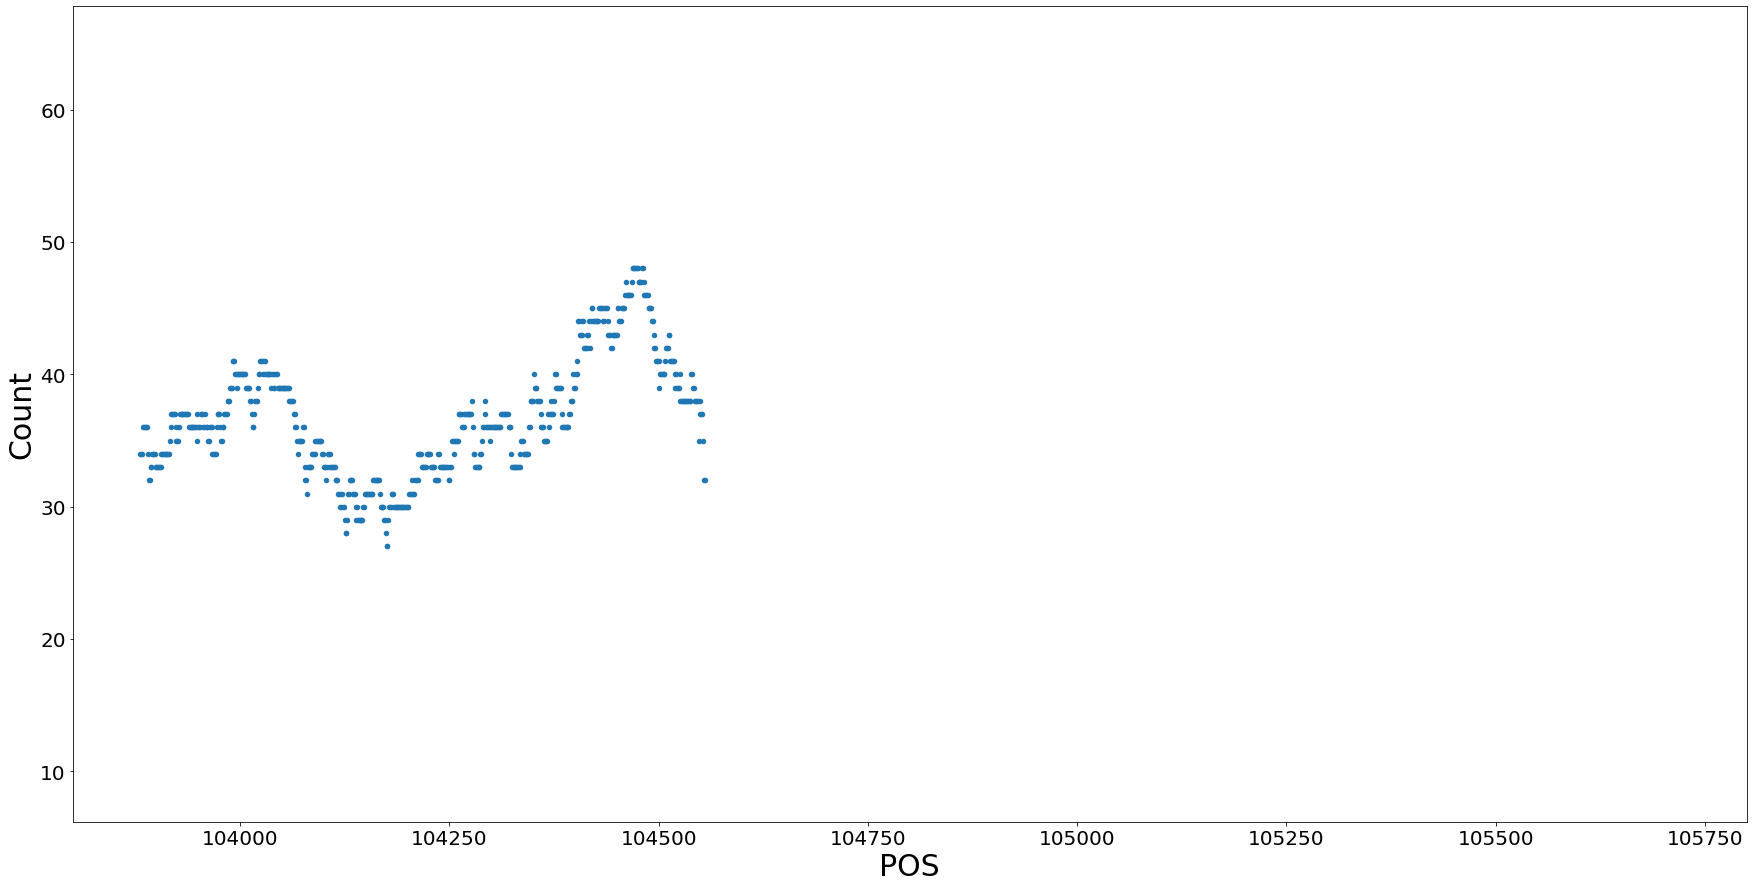

In [66]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(103800,105800), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_103800_104800.png')

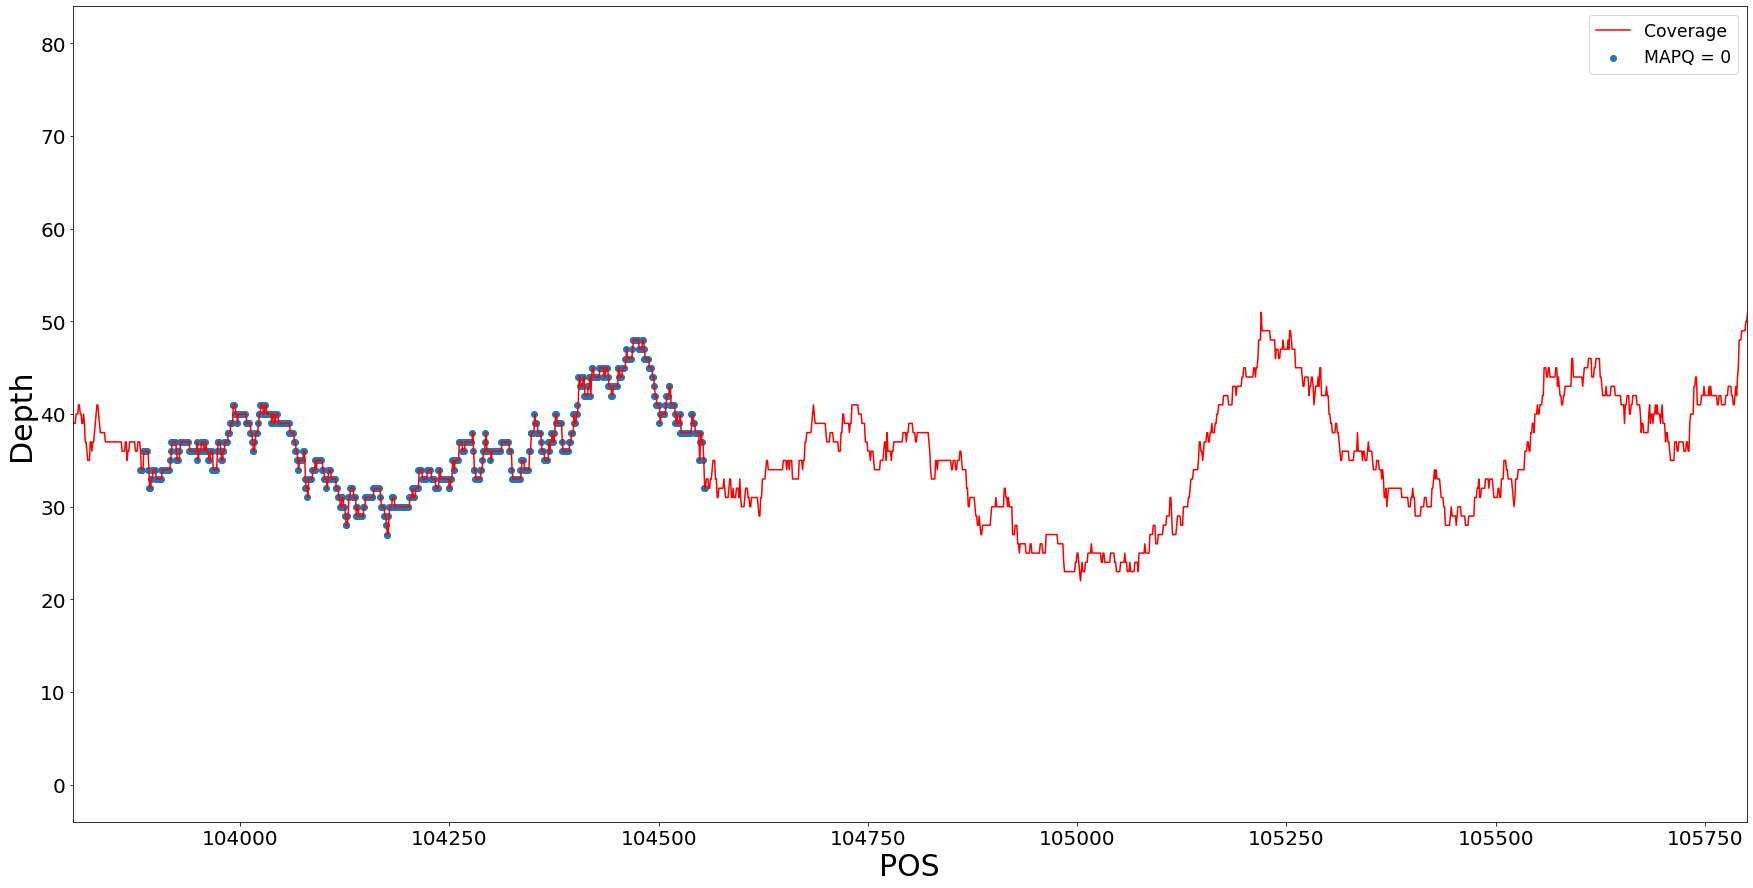

In [113]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(103800,105800)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_103800_104800.png')

In [15]:
ref0[ref0.start > 104600]

chr    start      end min_mapq max_mapq median_mapq  \
400351   NC_000962.3   400351   400352        0        0         0.0   
400352   NC_000962.3   400352   400353        0        0         0.0   
400353   NC_000962.3   400353   400354        0        0         0.0   
400354   NC_000962.3   400354   400355        0        0         0.0   
400355   NC_000962.3   400355   400356        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
400351           41  
400352           40  
400353           40  
400354           40  
400355           40  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[41299 rows x 7 columns]

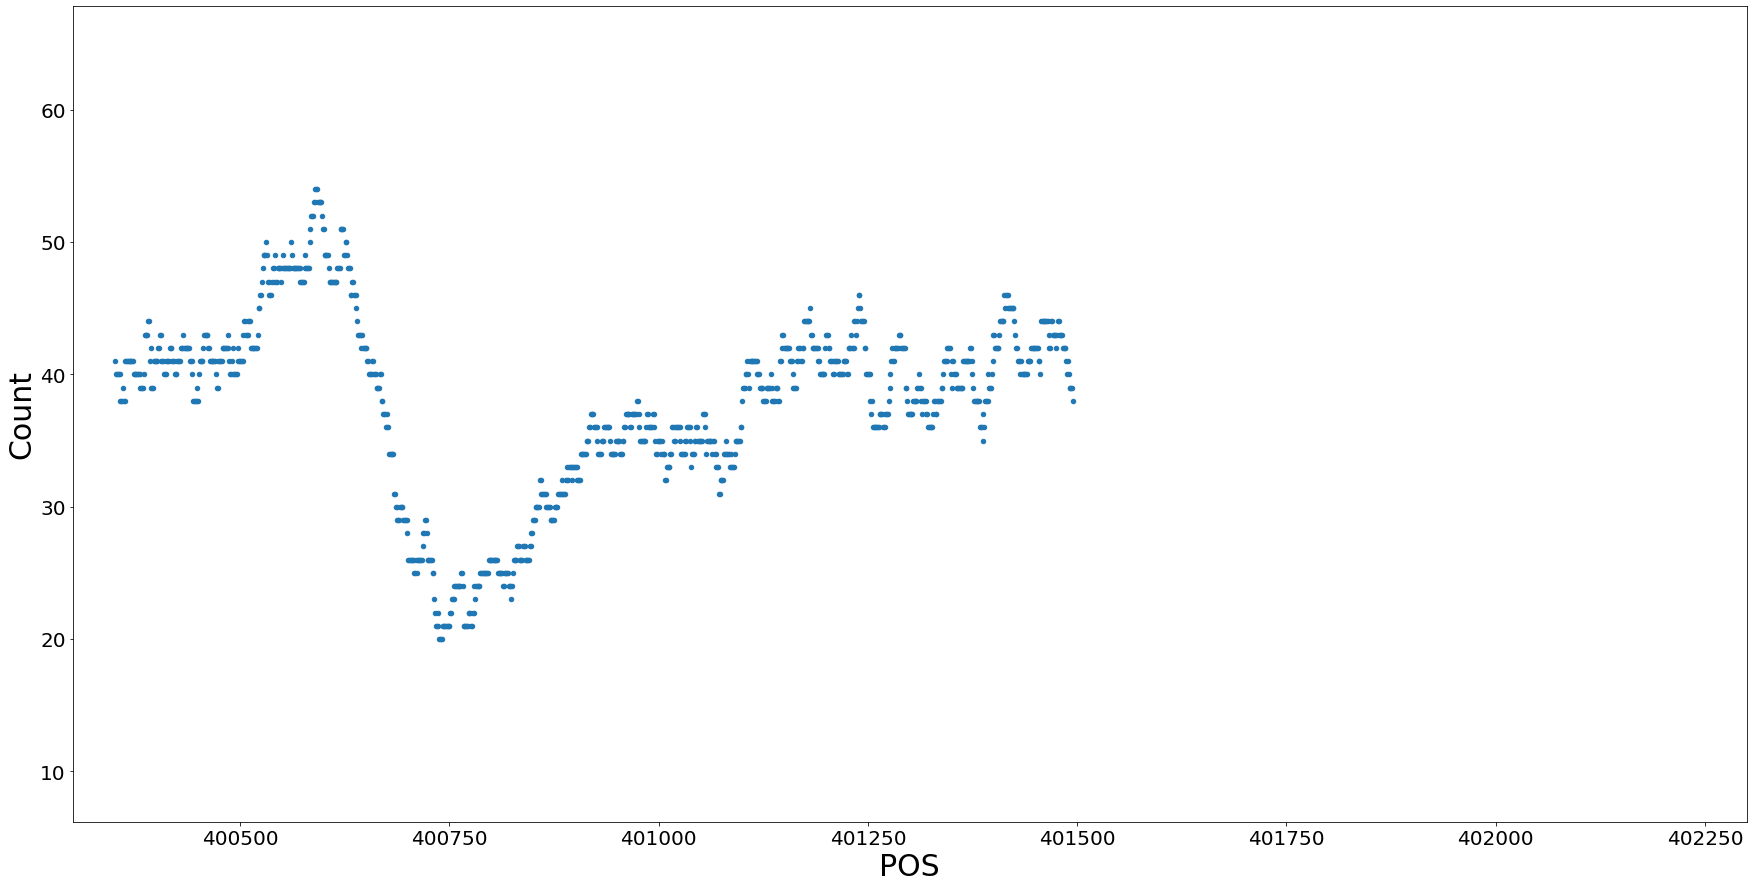

In [64]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(400300,402300), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_400300_402300.png')

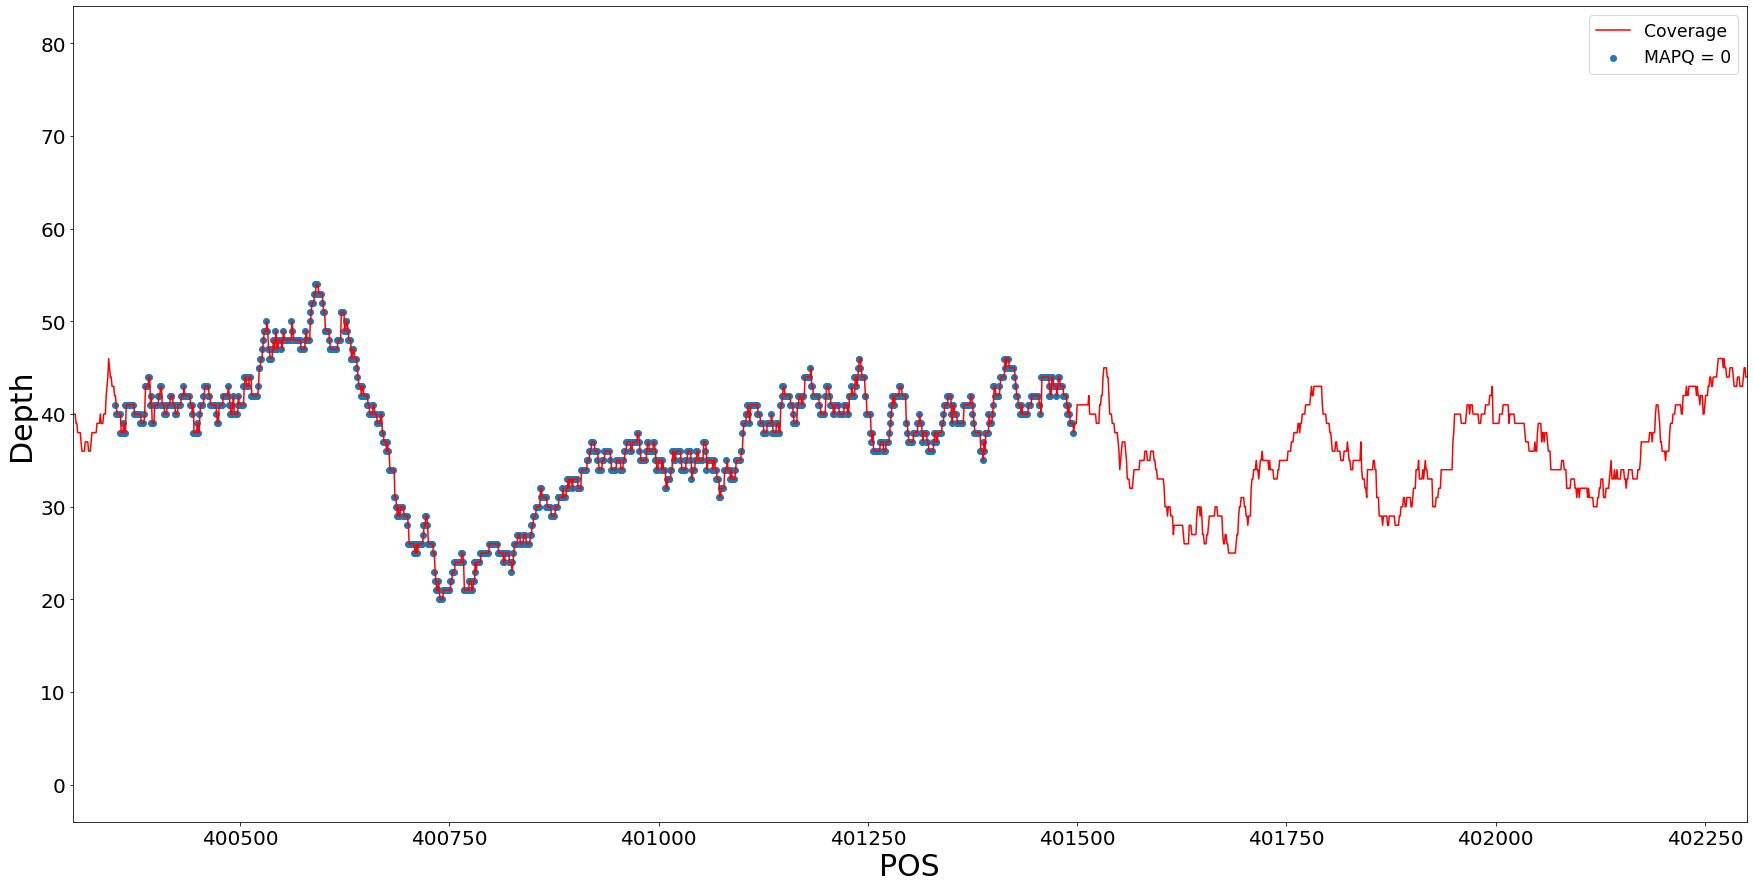

In [114]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(400300,402300)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_400300_402300.png')

In [22]:
ref0[ref0.start > 401600]

chr    start      end min_mapq max_mapq median_mapq  \
606704   NC_000962.3   606704   606705        0        0         0.0   
606705   NC_000962.3   606705   606706        0        0         0.0   
606706   NC_000962.3   606706   606707        0        0         0.0   
606707   NC_000962.3   606707   606708        0        0         0.0   
606708   NC_000962.3   606708   606709        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
606704           42  
606705           42  
606706           42  
606707           42  
606708           42  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[40154 rows x 7 columns]

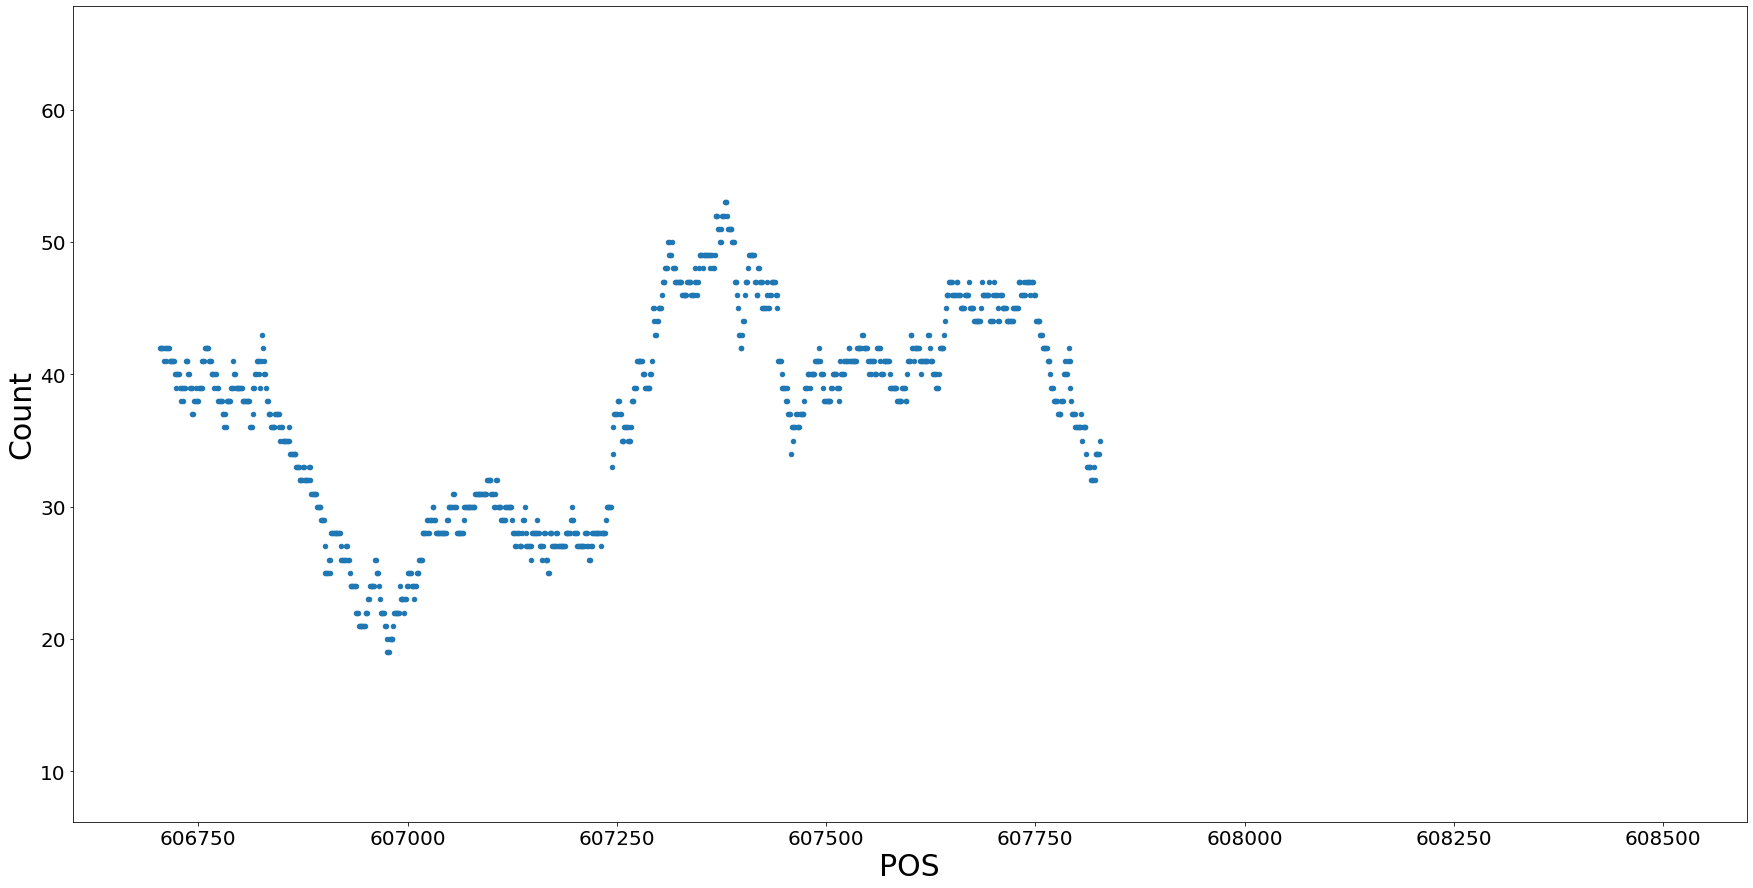

In [65]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(606600,608600), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_606600_608600.png')

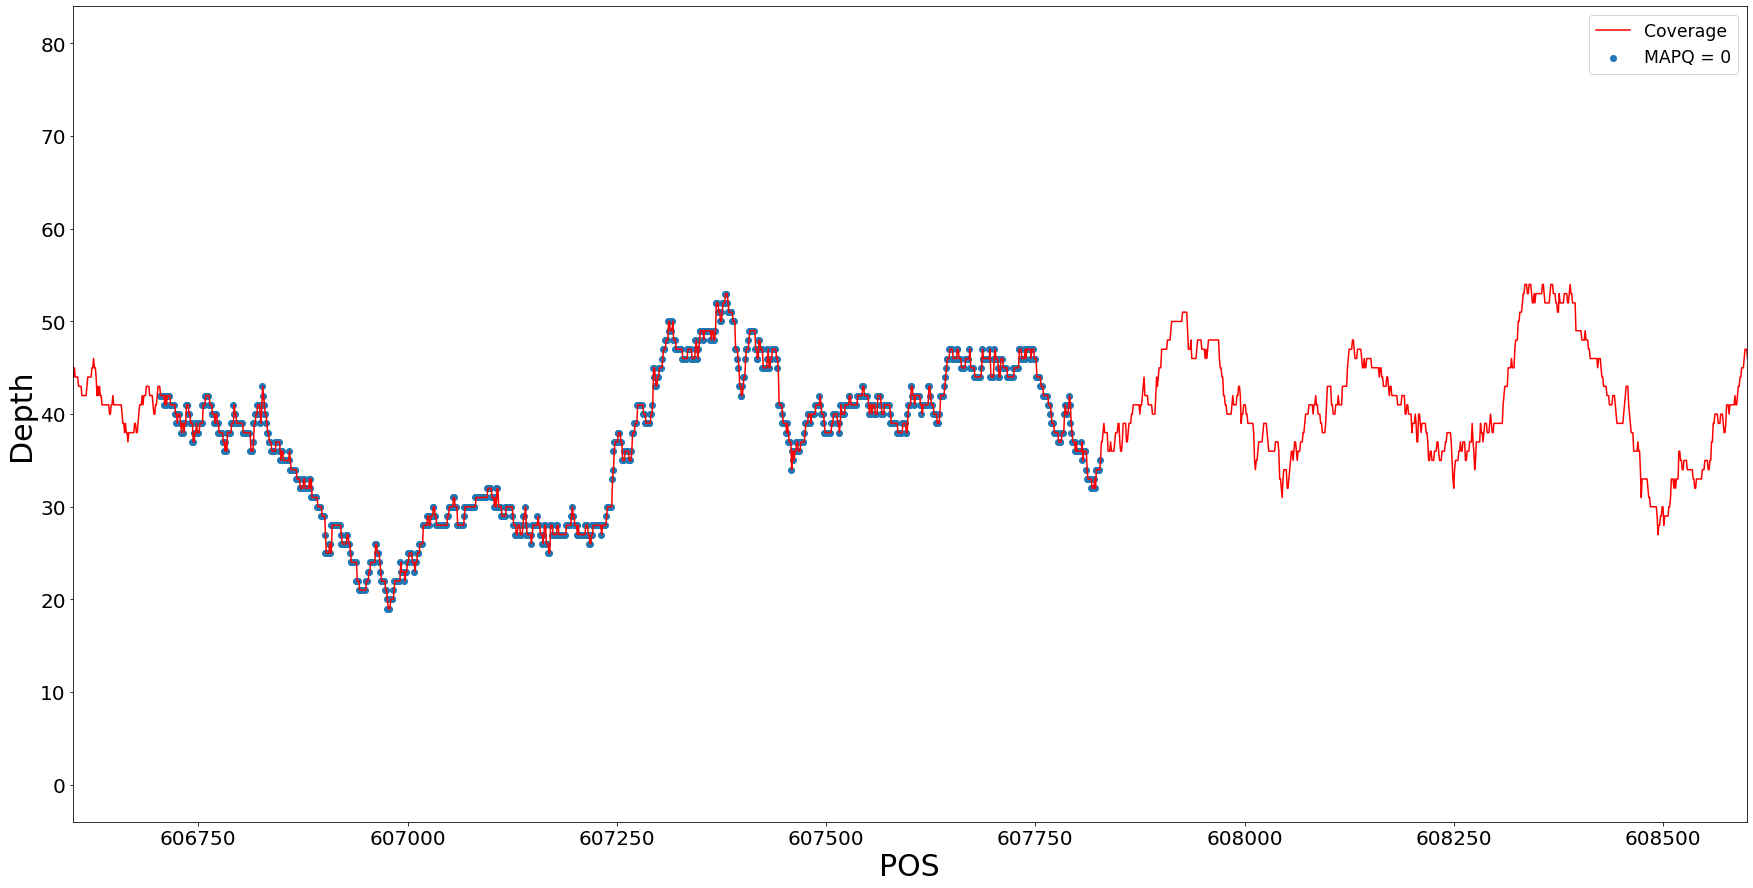

In [115]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(606600,608600)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_606600_608600.png')

In [26]:
ref0[ref0.start > 608000]

chr    start      end min_mapq max_mapq median_mapq  \
889205   NC_000962.3   889205   889206        0        0         0.0   
889206   NC_000962.3   889206   889207        0        0         0.0   
889207   NC_000962.3   889207   889208        0        0         0.0   
889208   NC_000962.3   889208   889209        0        0         0.0   
889209   NC_000962.3   889209   889210        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
889205           32  
889206           32  
889207           35  
889208           35  
889209           35  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[39030 rows x 7 columns]

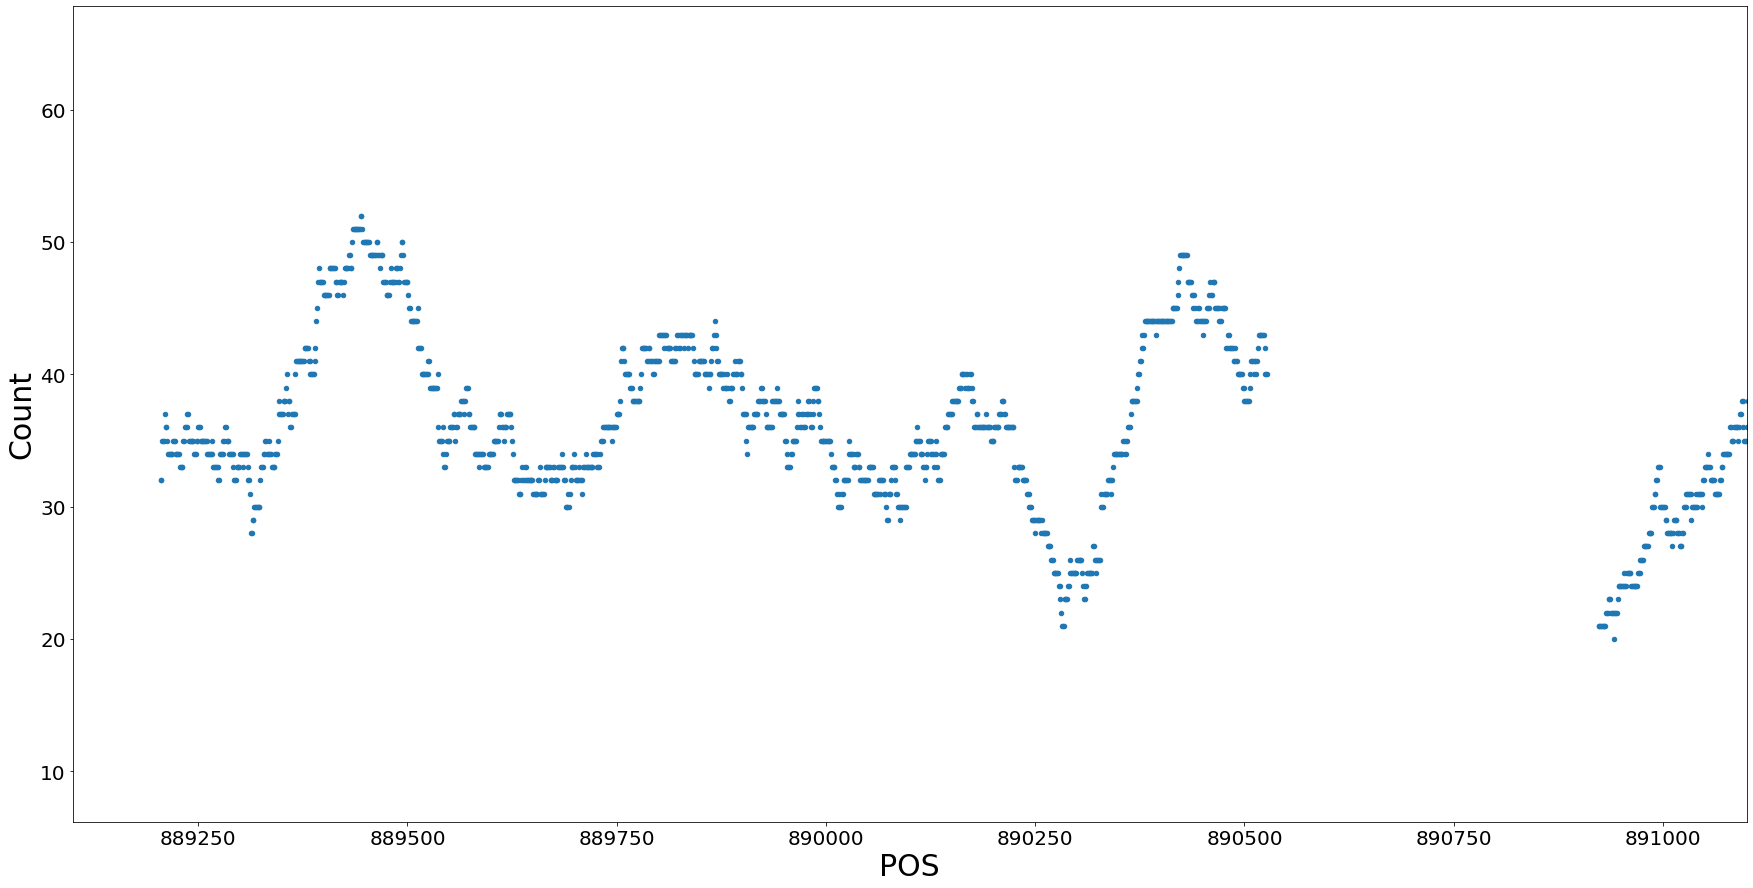

In [67]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(889100,891100), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_889100_891100.png')

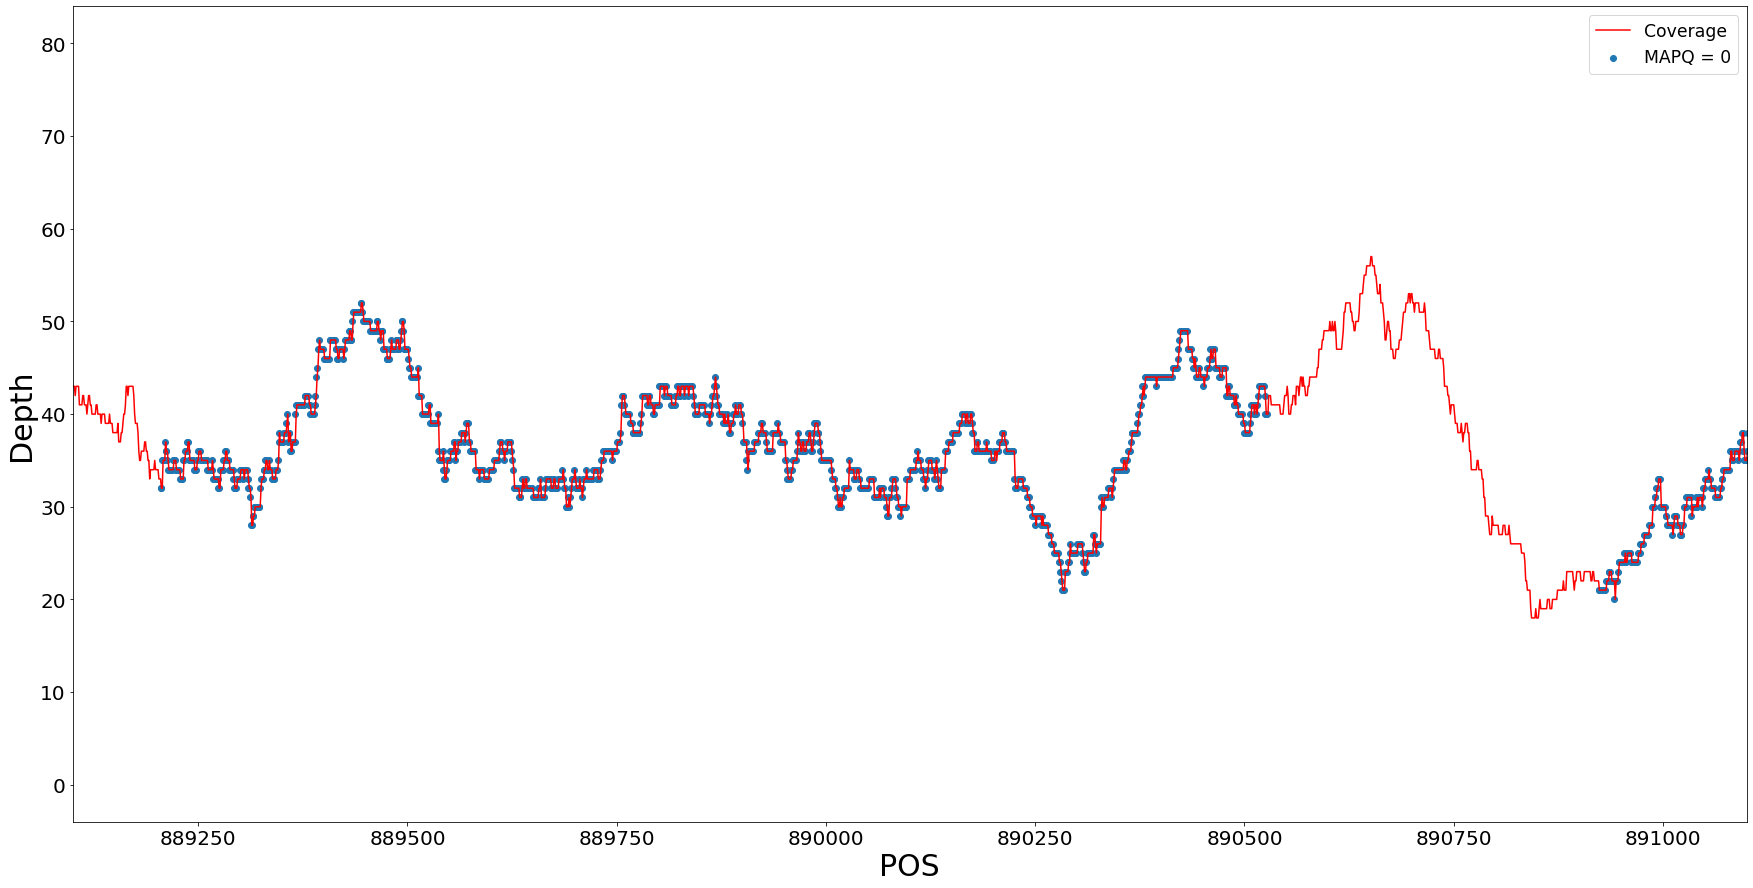

In [117]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(889100,891100)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_889100_891100.png')

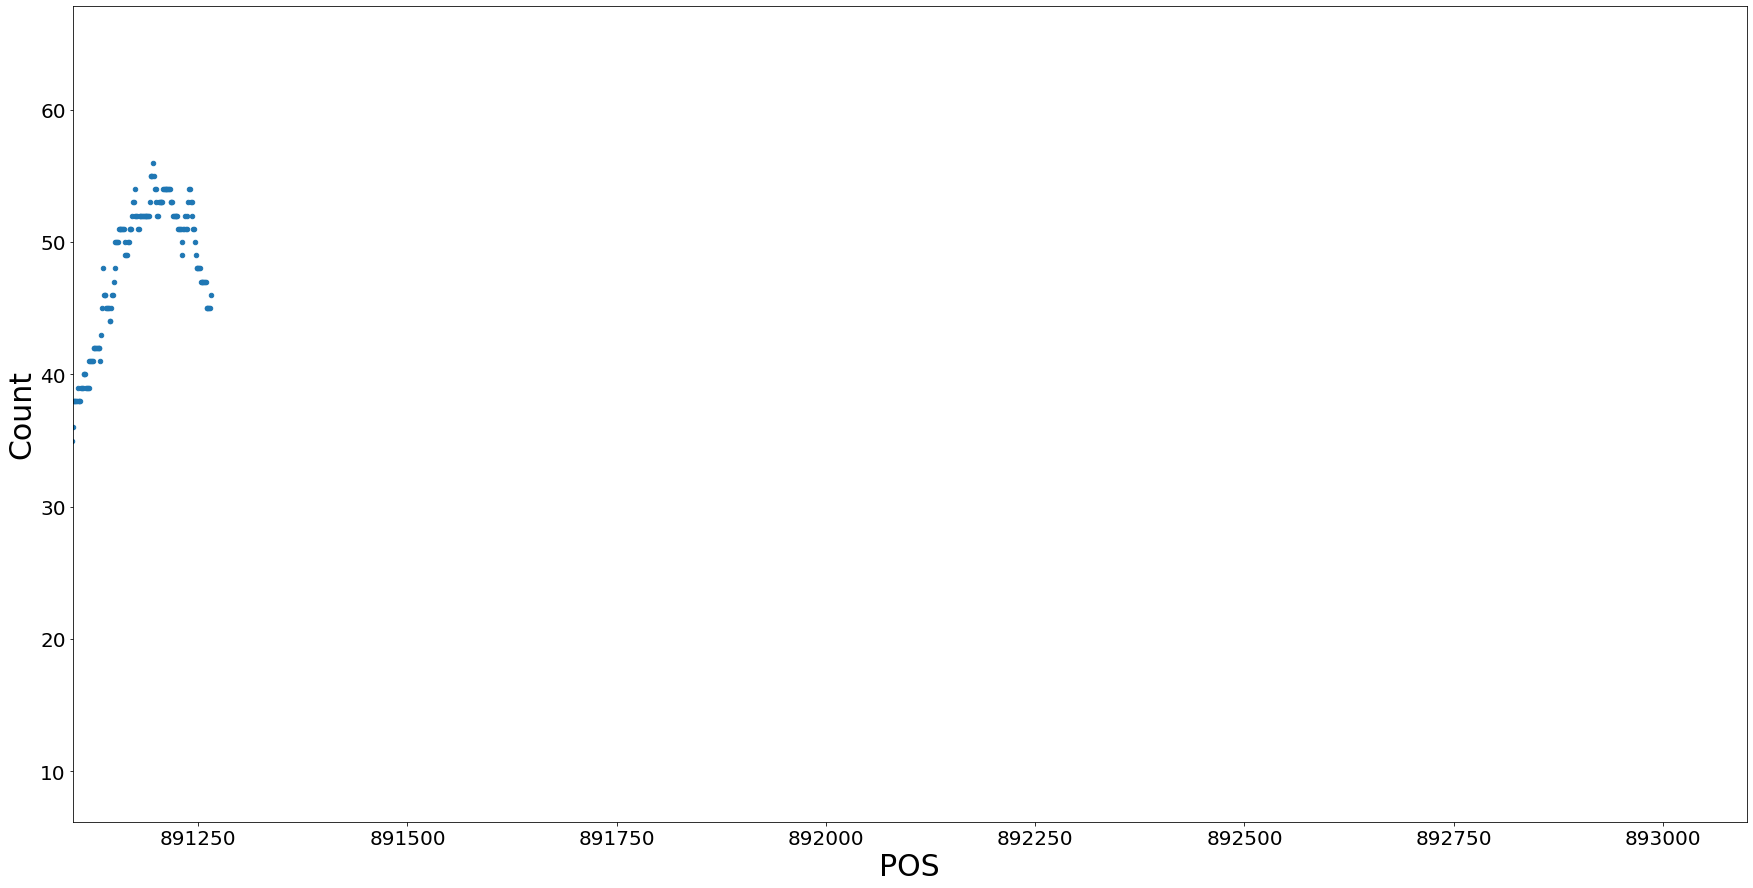

In [68]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(891100,893100), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_891100_893100.png')

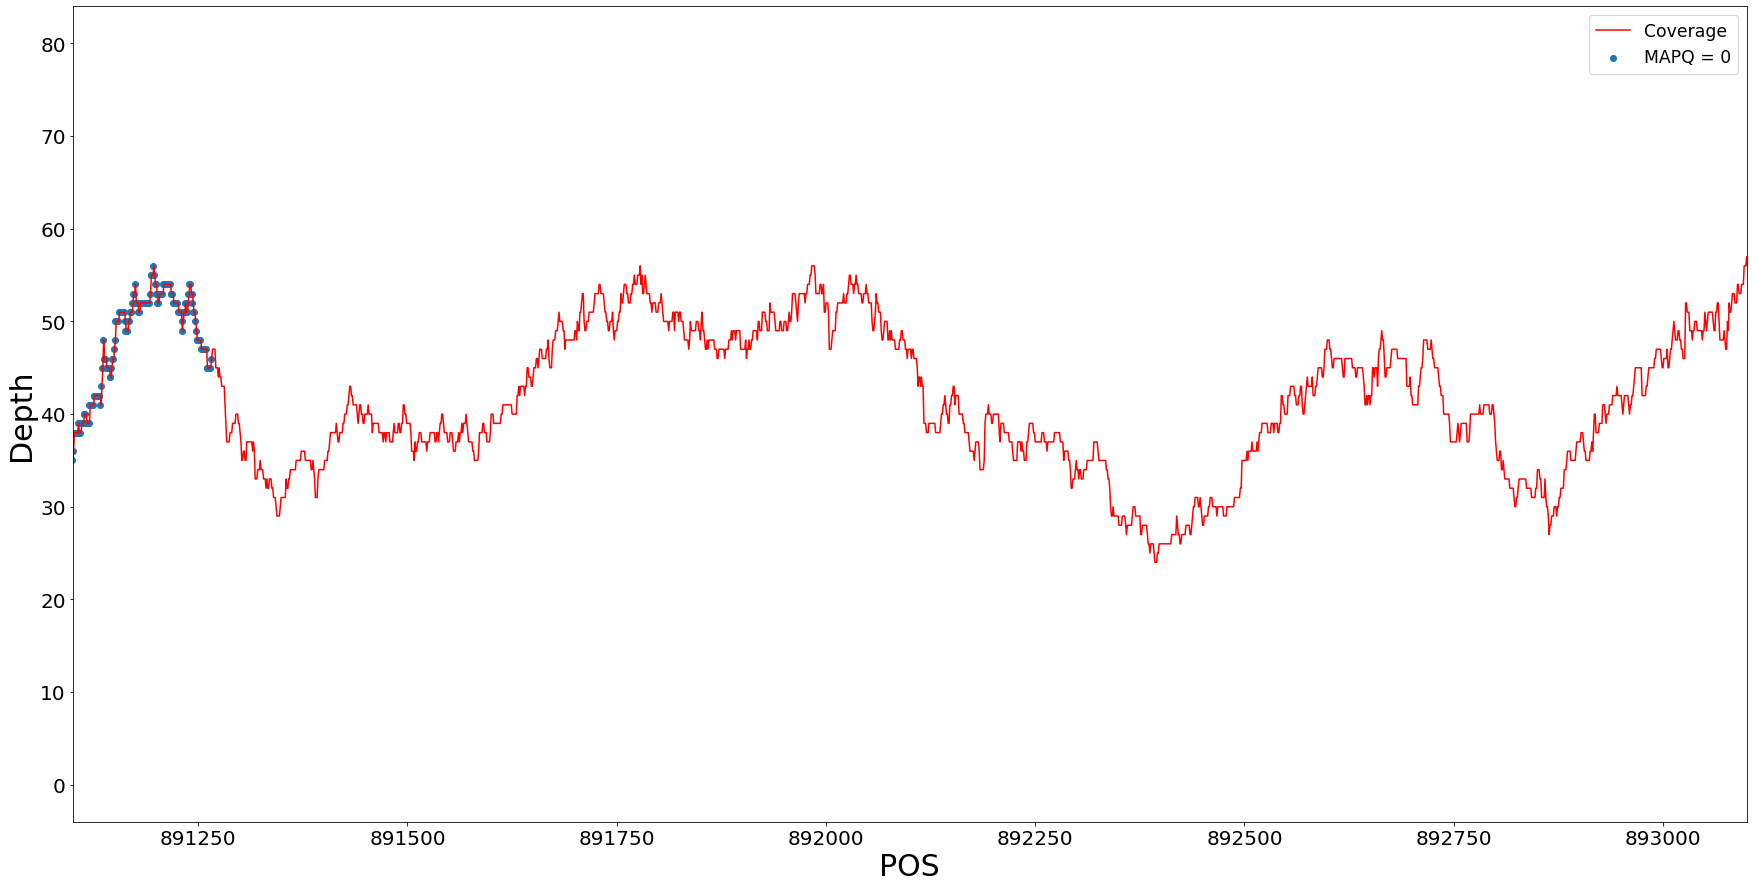

In [118]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(891100,893100)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_891100_893100.png')

In [35]:
ref0[ref0.start > 891400]

chr    start      end min_mapq max_mapq median_mapq  \
908379   NC_000962.3   908379   908380        0        0         0.0   
908380   NC_000962.3   908380   908381        0        0         0.0   
908381   NC_000962.3   908381   908382        0        0         0.0   
908382   NC_000962.3   908382   908383        0        0         0.0   
908383   NC_000962.3   908383   908384        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
908379           45  
908380           45  
908381           47  
908382           47  
908383           48  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[37364 rows x 7 columns]

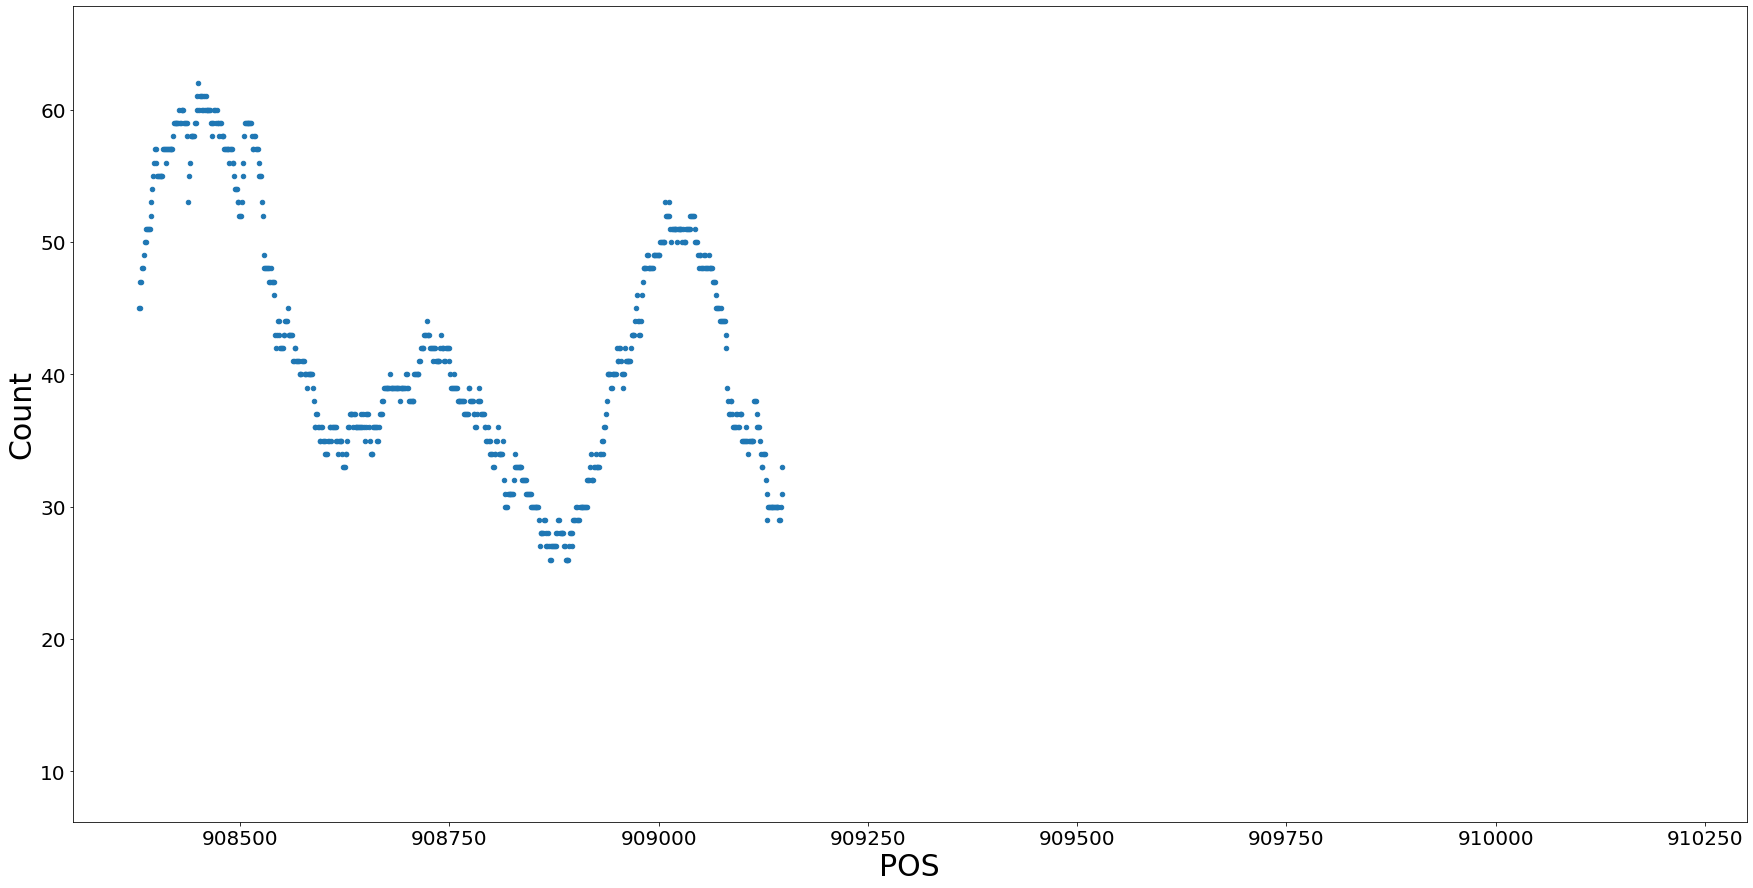

In [69]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(908300,910300), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_908300_910300.png')

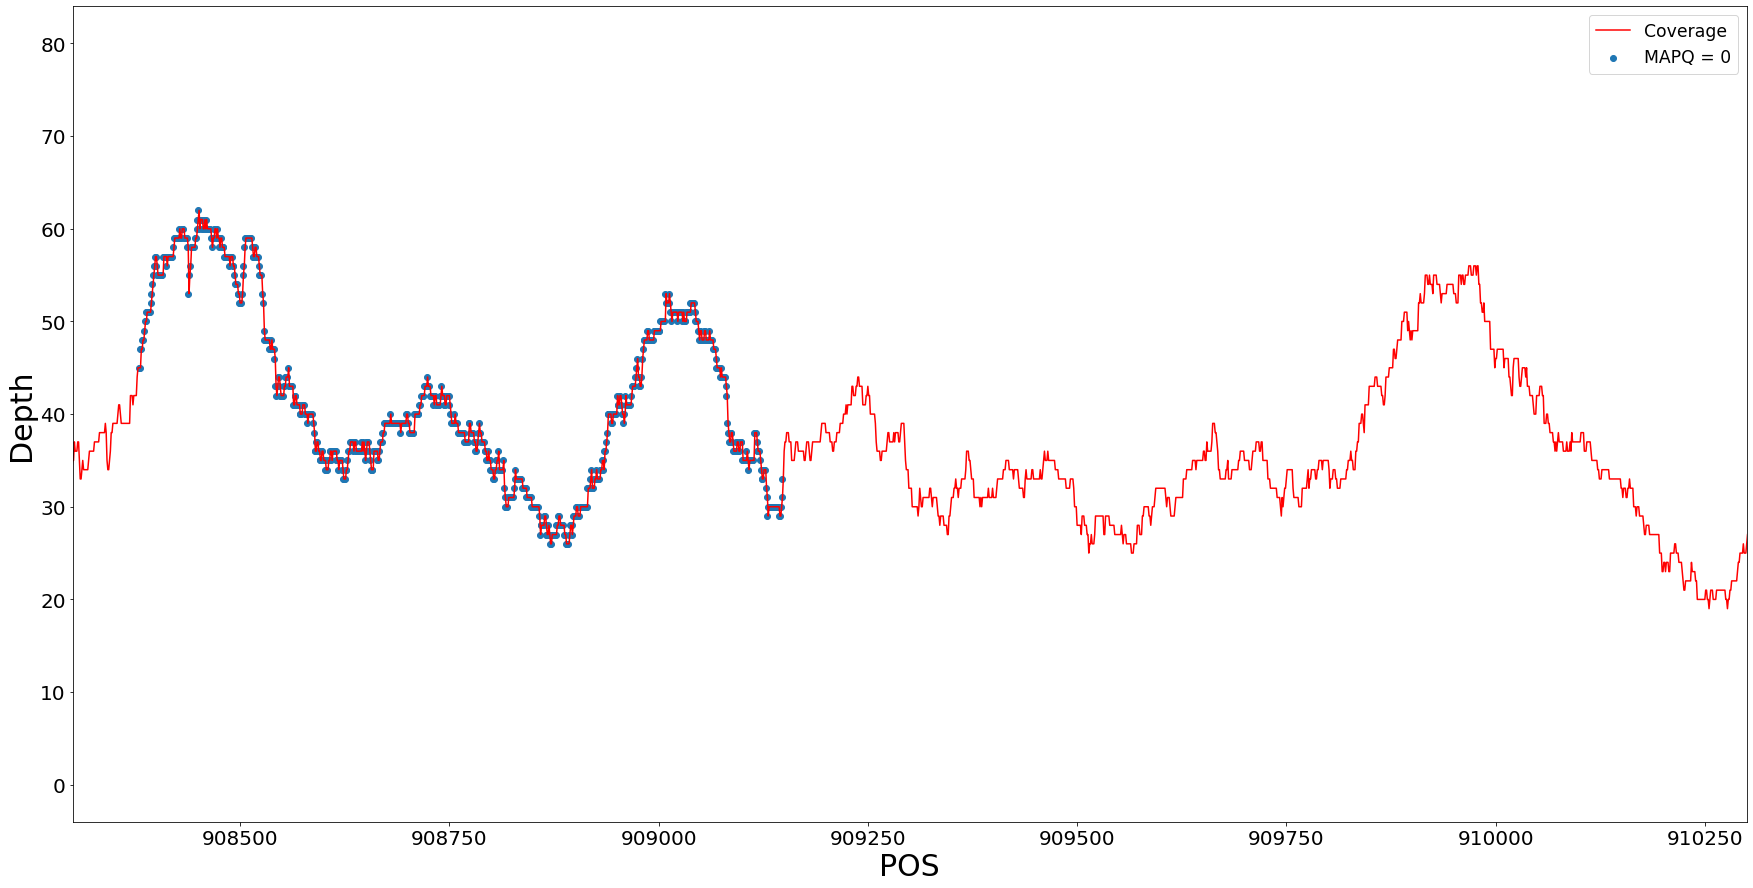

In [119]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(908300,910300)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_908300_910300.png')

In [43]:
ref0[ref0.start > 909200]

chr    start      end min_mapq max_mapq median_mapq  \
1094094  NC_000962.3  1094094  1094095        0        0         0.0   
1094095  NC_000962.3  1094095  1094096        0        0         0.0   
1094096  NC_000962.3  1094096  1094097        0        0         0.0   
1094097  NC_000962.3  1094097  1094098        0        0         0.0   
1094098  NC_000962.3  1094098  1094099        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1094094          58  
1094095          58  
1094096          58  
1094097          57  
1094098          57  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[36594 rows x 7 columns]

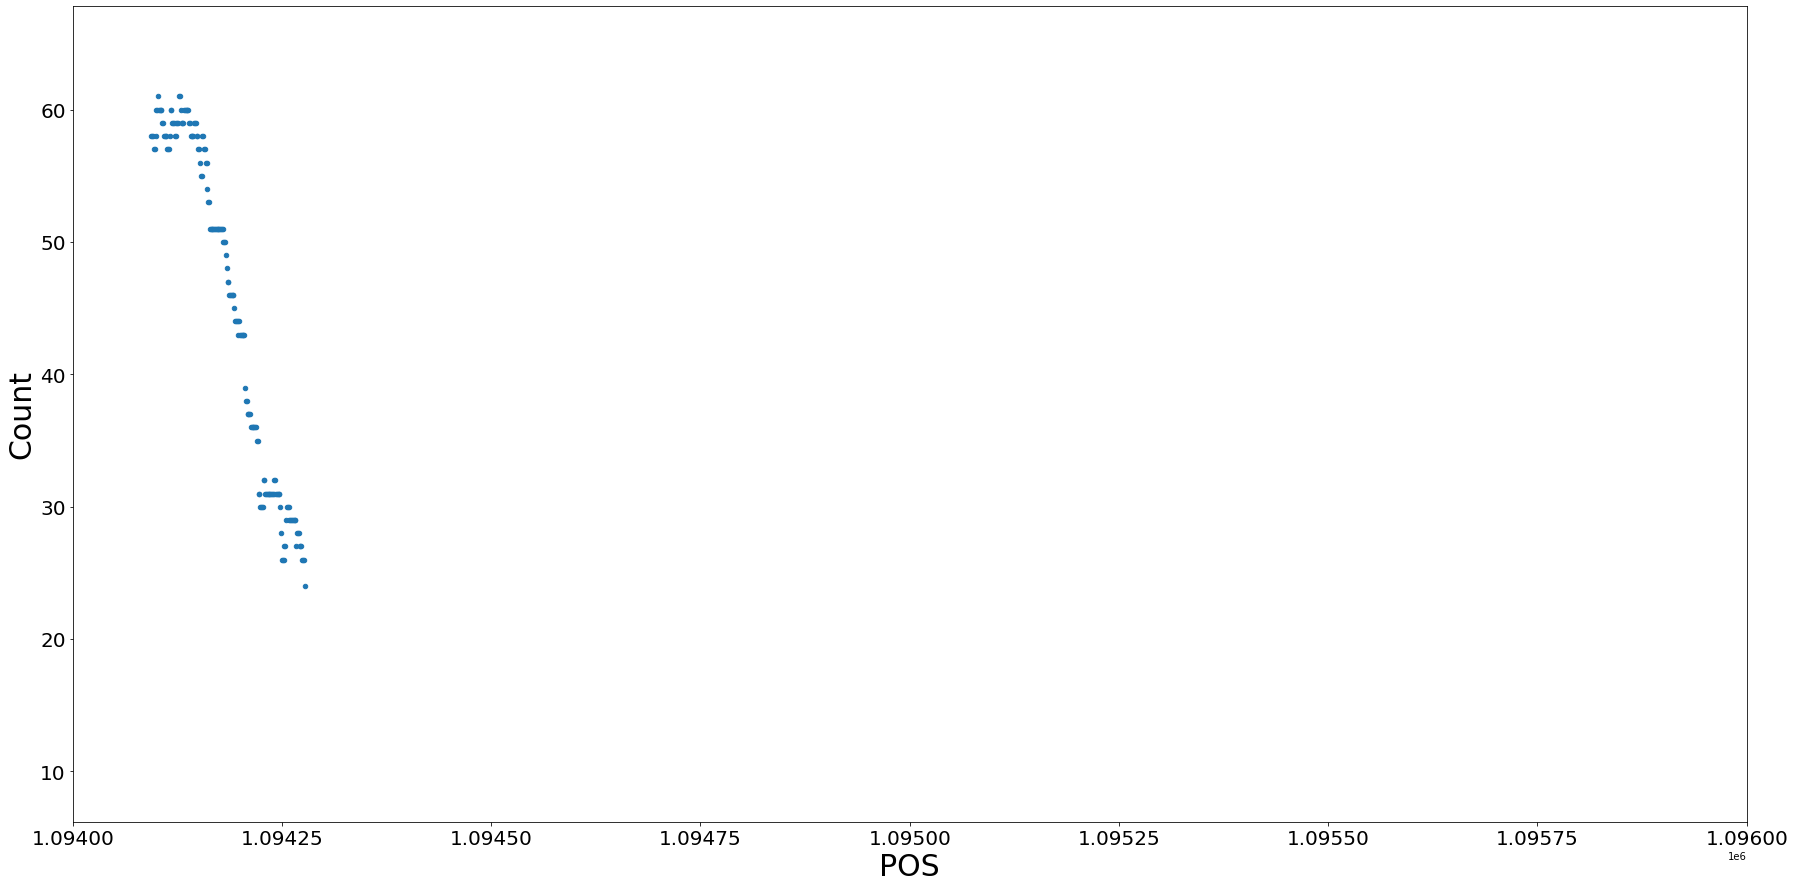

In [70]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1094000,1096000), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1094000_1096000.png')

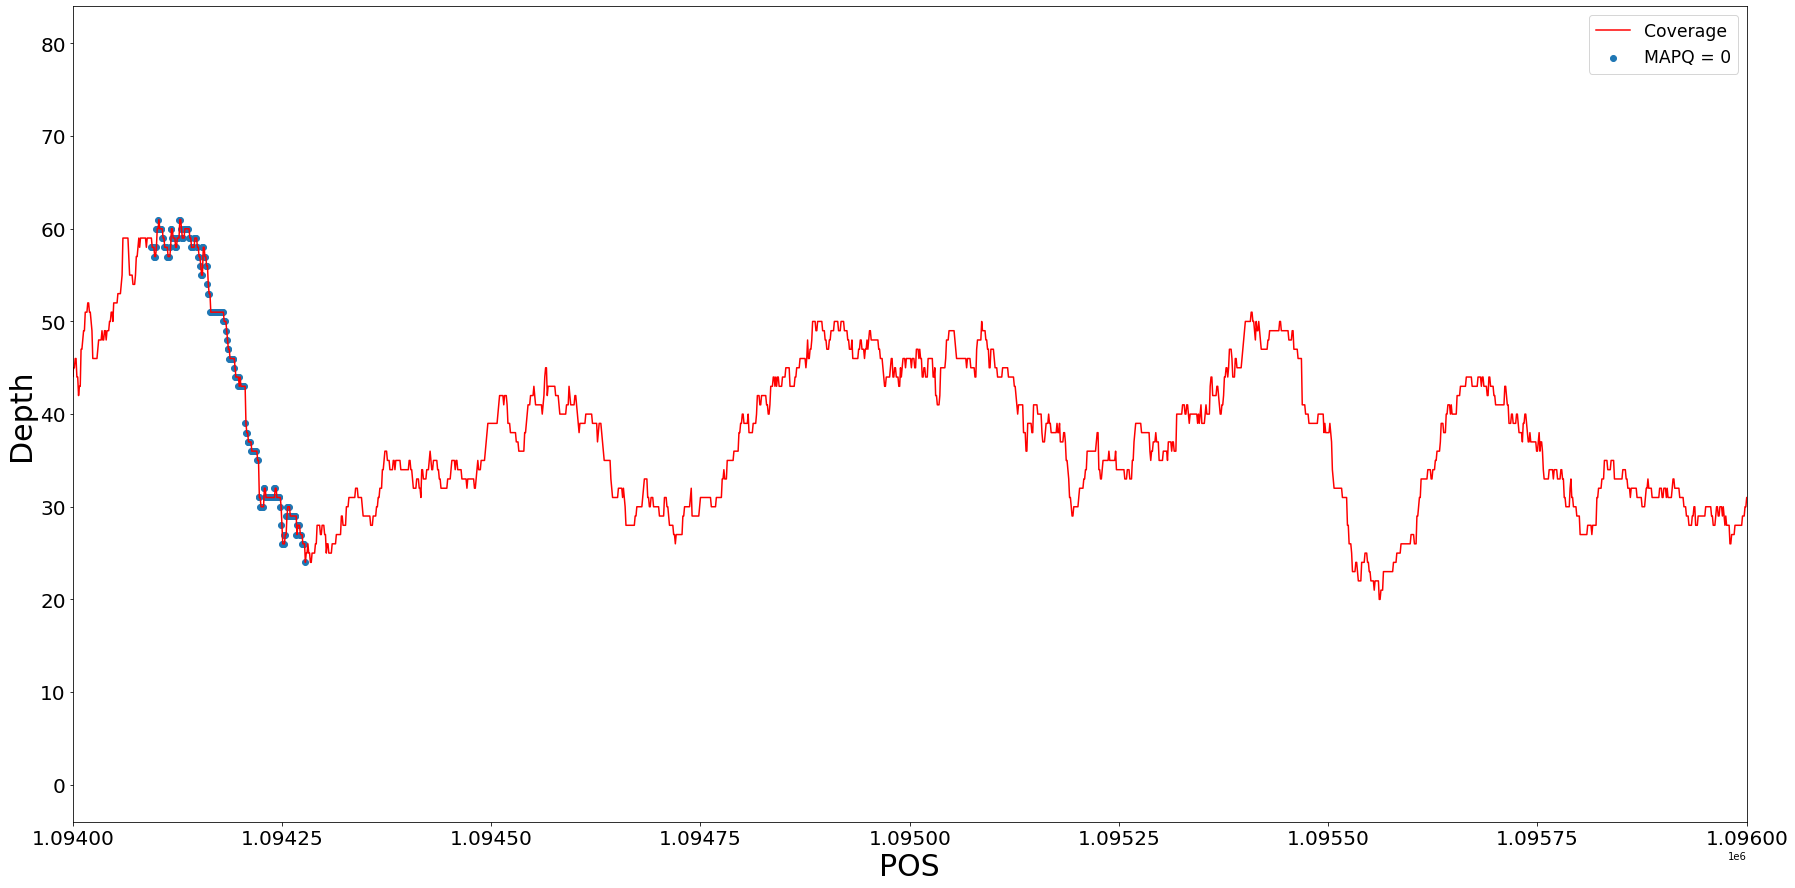

In [120]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1094000,1096000)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1094000_1096000.png')

In [47]:
ref0[ref0.start > 1094500]

chr    start      end min_mapq max_mapq median_mapq  \
1160745  NC_000962.3  1160745  1160746        0        0         0.0   
1160746  NC_000962.3  1160746  1160747        0        0         0.0   
1160747  NC_000962.3  1160747  1160748        0        0         0.0   
1160748  NC_000962.3  1160748  1160749        0        0         0.0   
1160749  NC_000962.3  1160749  1160750        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1160745          43  
1160746          43  
1160747          43  
1160748          43  
1160749          43  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[36410 rows x 7 columns]

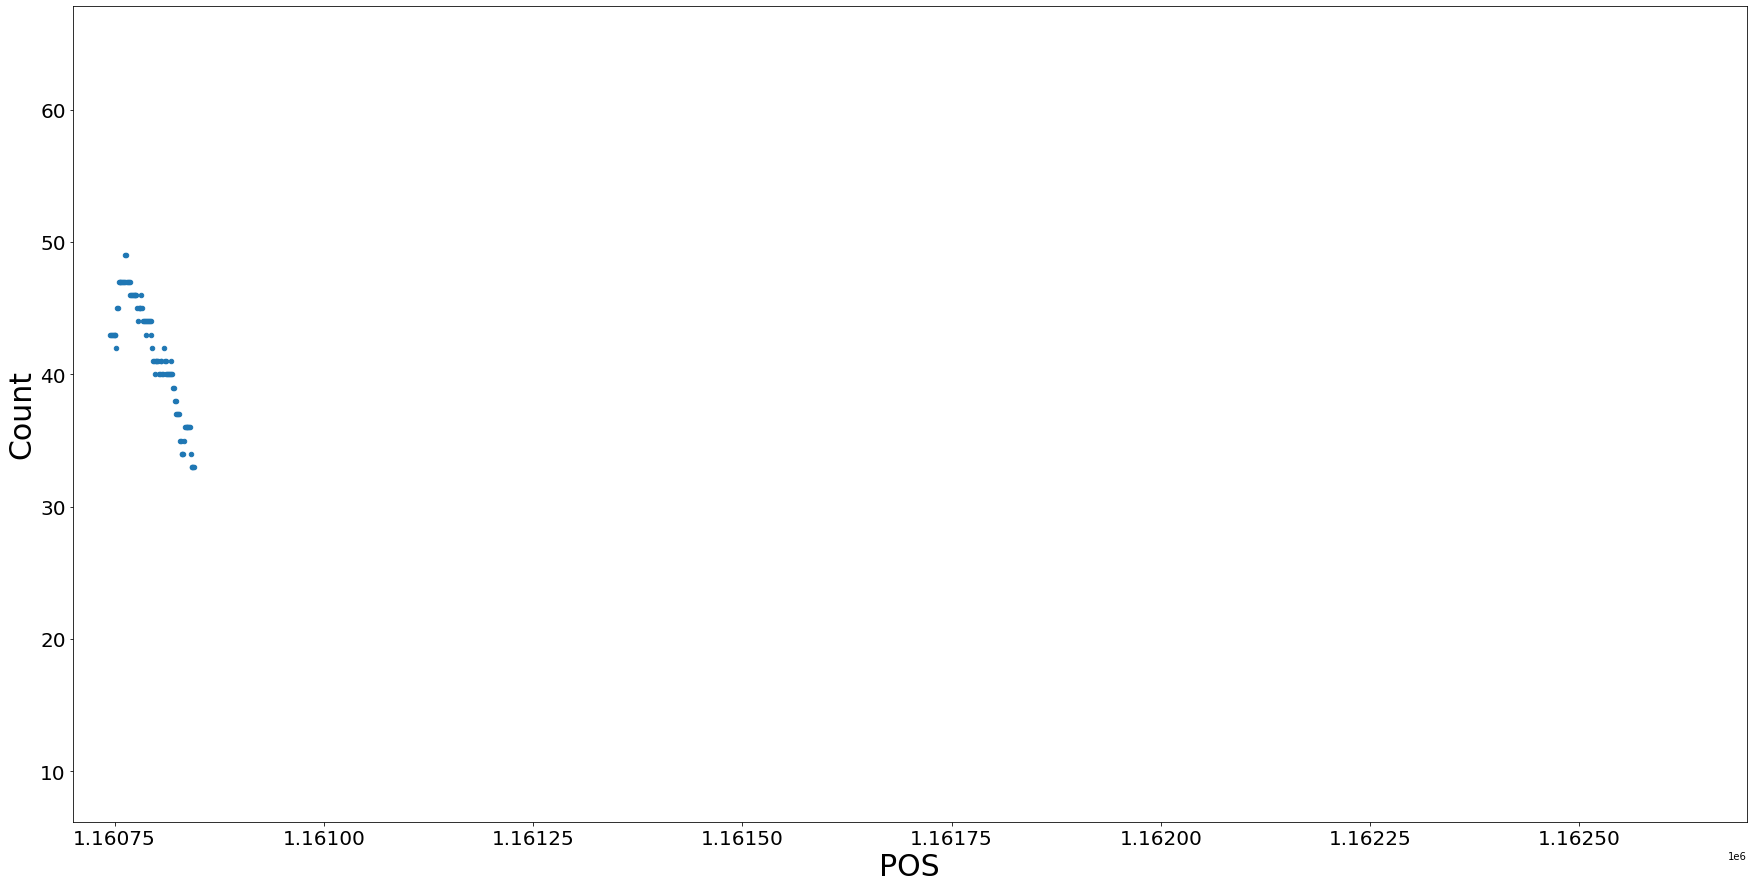

In [71]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1160700,1162700), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1160700_1162700.png')

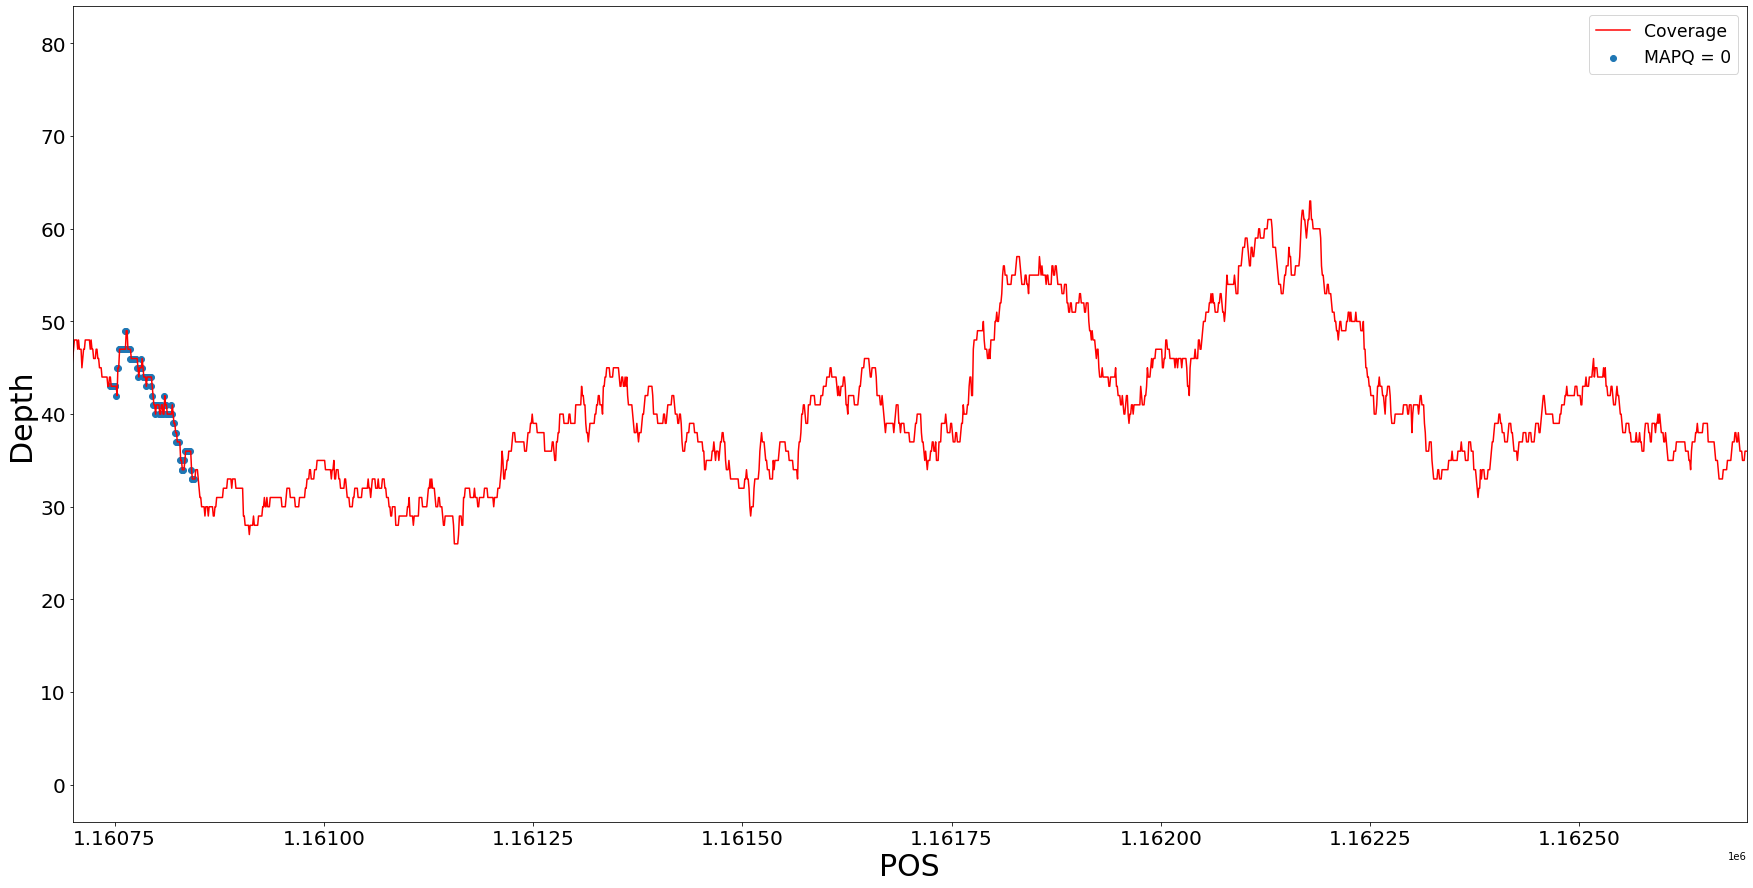

In [121]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1160700,1162700)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1160700_1162700.png')

In [52]:
ref0[ref0.start > 1160900]

chr    start      end min_mapq max_mapq median_mapq  \
1164774  NC_000962.3  1164774  1164775        0        0         0.0   
1164775  NC_000962.3  1164775  1164776        0        0         0.0   
1164776  NC_000962.3  1164776  1164777        0        0         0.0   
1164777  NC_000962.3  1164777  1164778        0        0         0.0   
1164778  NC_000962.3  1164778  1164779        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1164774          53  
1164775          52  
1164776          51  
1164777          52  
1164778          51  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[36309 rows x 7 columns]

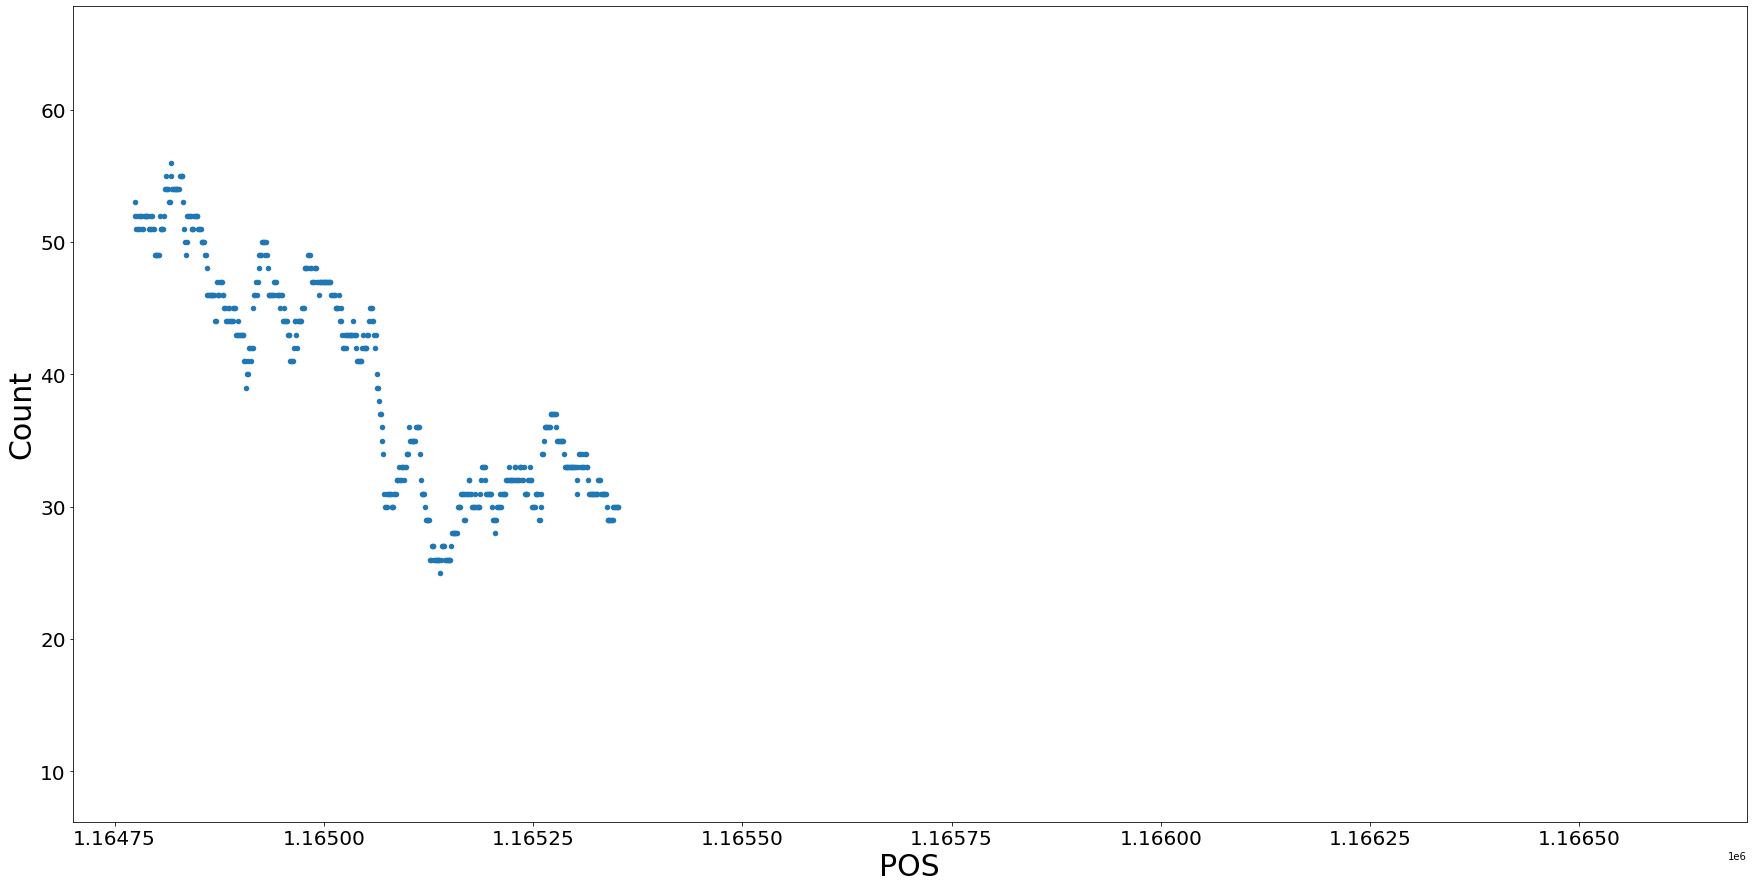

In [72]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1164700,1166700), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1164700_1166700.png')

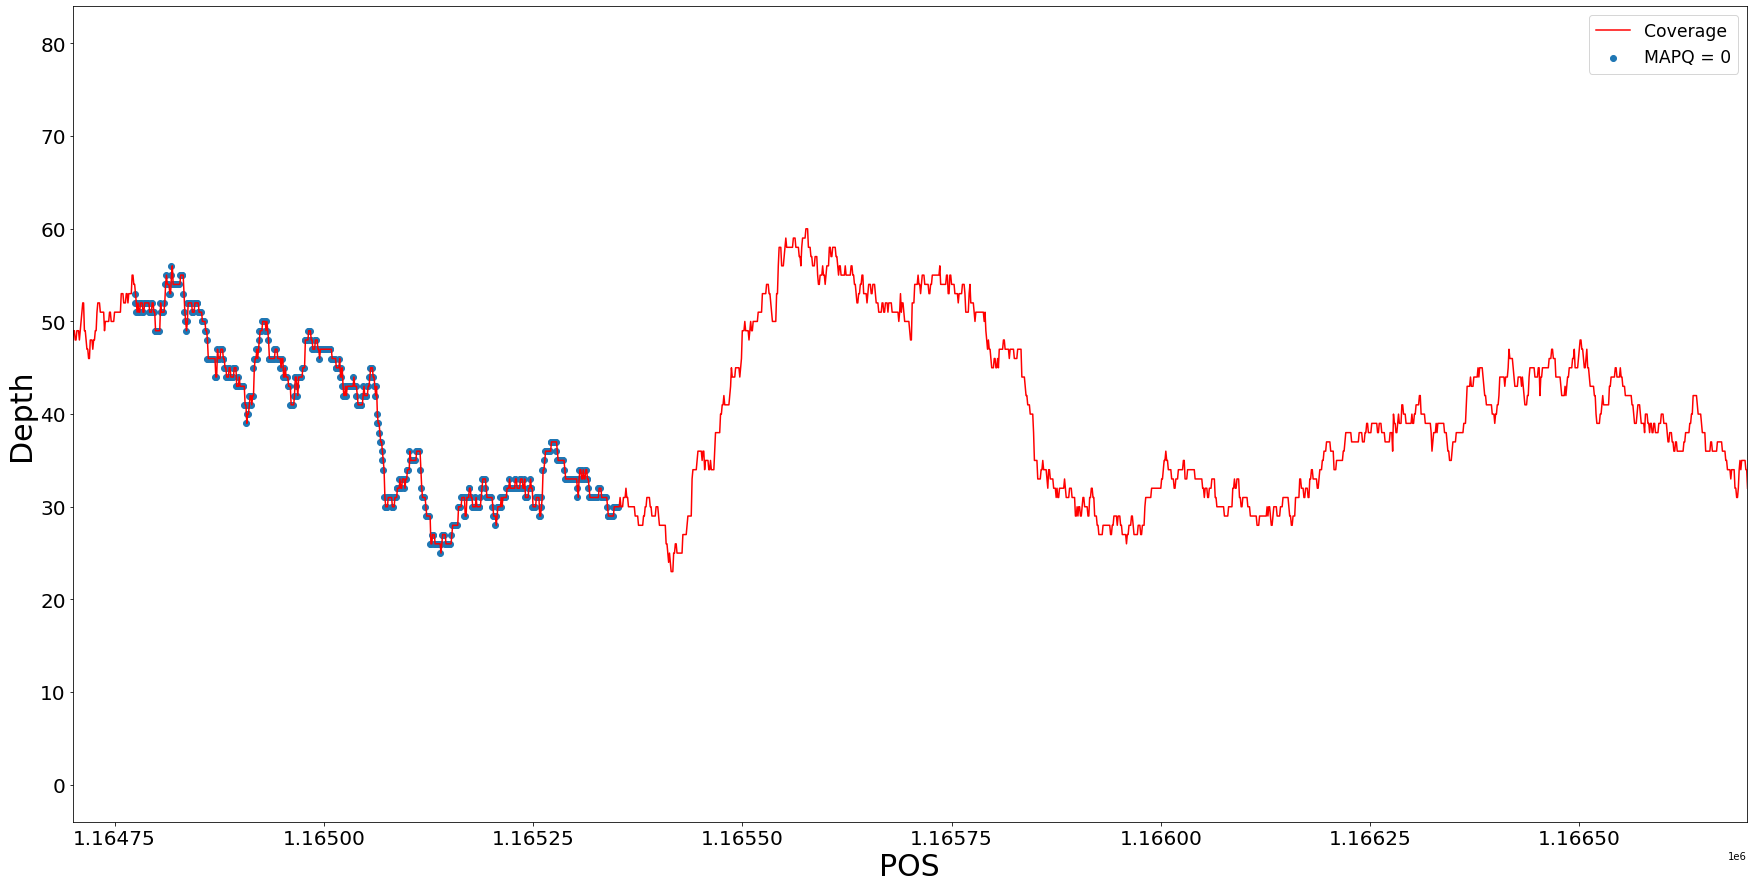

In [122]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1164700,1166700)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1164700_1166700.png')

In [56]:
ref0[ref0.start > 1165500]

chr    start      end min_mapq max_mapq median_mapq  \
1169488  NC_000962.3  1169488  1169489        0        0         0.0   
1169489  NC_000962.3  1169489  1169490        0        0         0.0   
1169490  NC_000962.3  1169490  1169491        0        0         0.0   
1169491  NC_000962.3  1169491  1169492        0        0         0.0   
1169492  NC_000962.3  1169492  1169493        0        0         0.0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1169488          36  
1169489          35  
1169490          35  
1169491          36  
1169492          36  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[35730 rows x 7 columns]

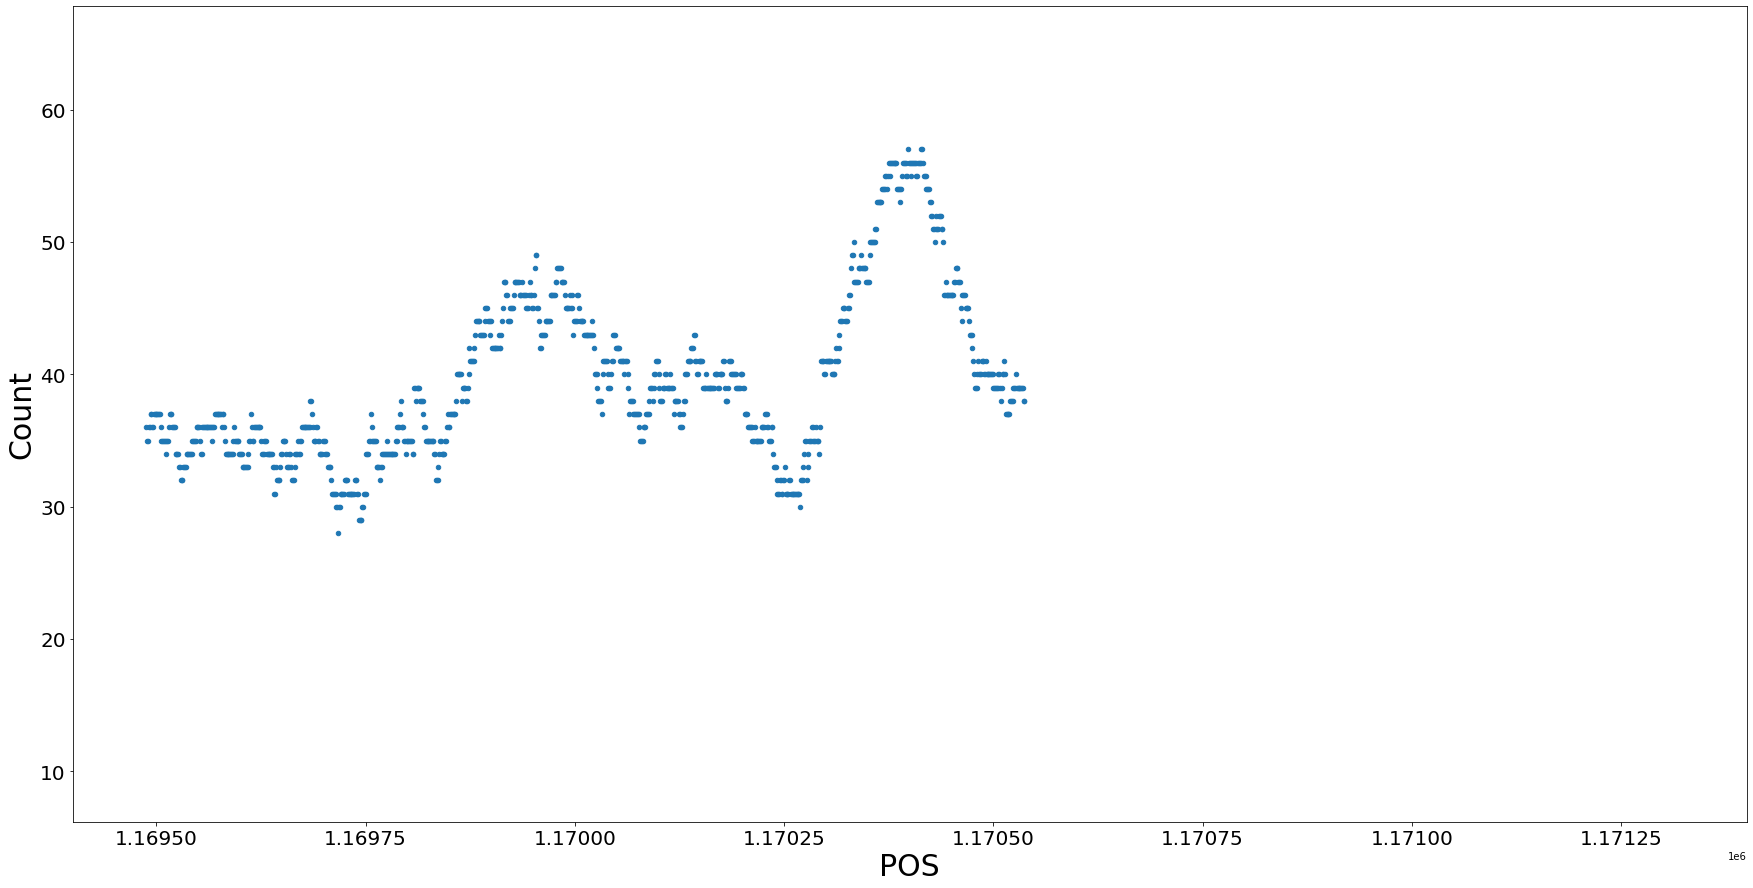

In [74]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1169400,1171400), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1169400_1171400.png')

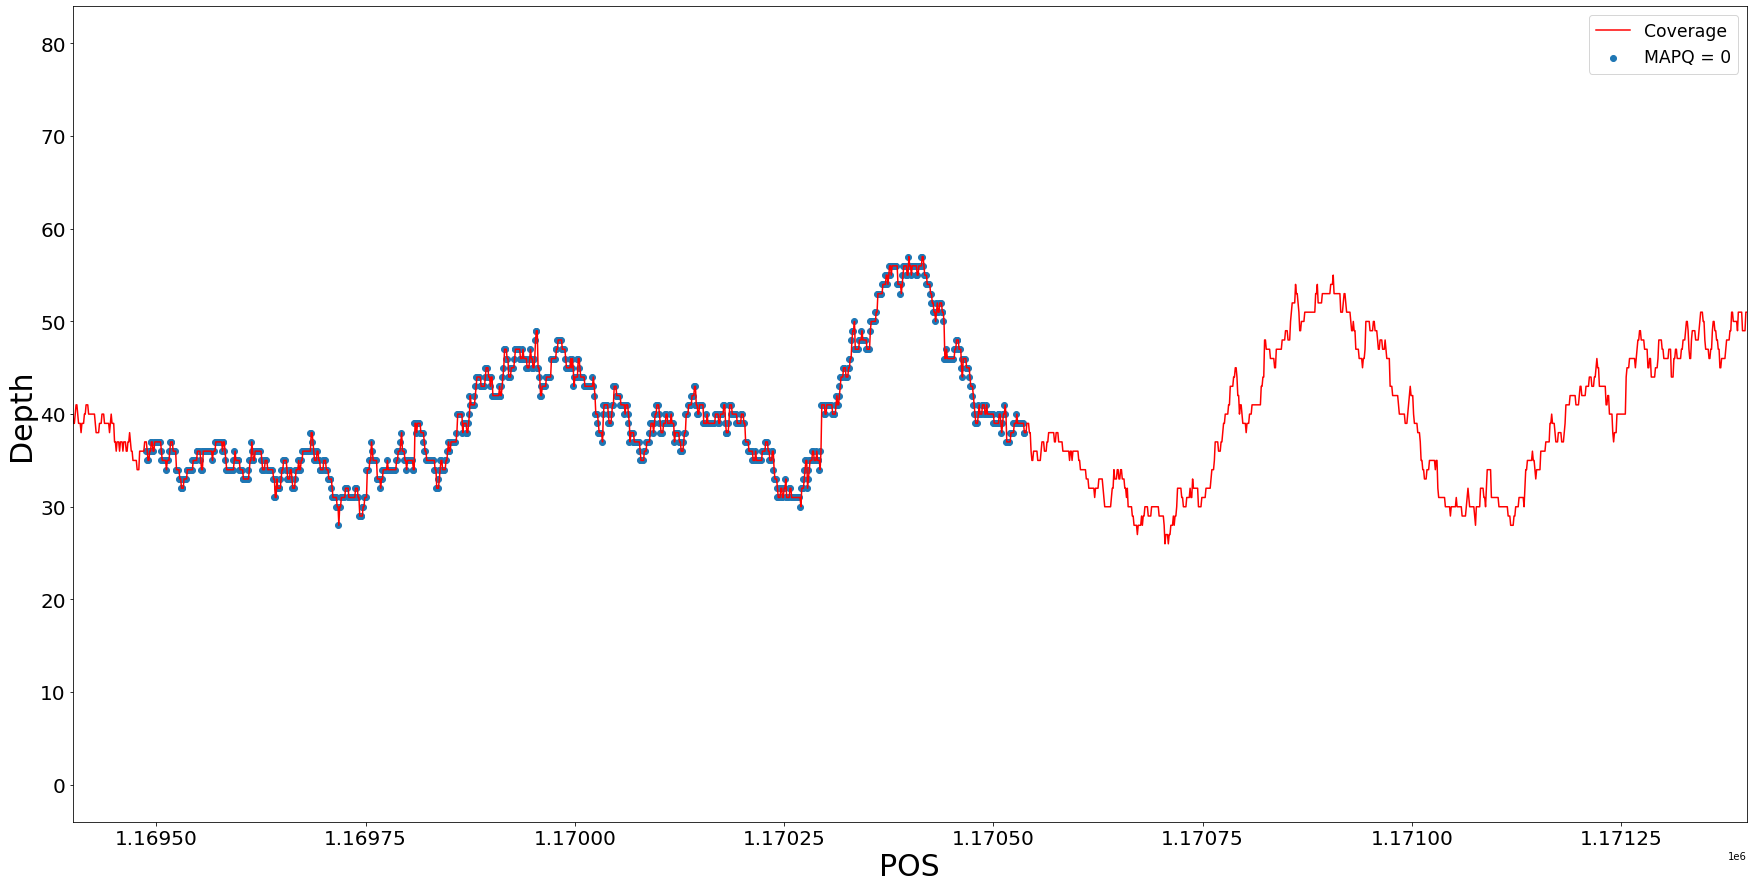

In [123]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1169400,1171400)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1169400_1171400.png')

In [61]:
ref0[ref0.start > 1170600]

chr    start      end min_mapq max_mapq median_mapq  \
1277122  NC_000962.3  1277122  1277123        0        0           0   
1277123  NC_000962.3  1277123  1277124        0        0           0   
1277124  NC_000962.3  1277124  1277125        0        0           0   
1277125  NC_000962.3  1277125  1277126        0        0           0   
1277126  NC_000962.3  1277126  1277127        0        0           0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1277122          48  
1277123          48  
1277124          48  
1277125          47  
1277126          47  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[34680 rows x 7 columns]

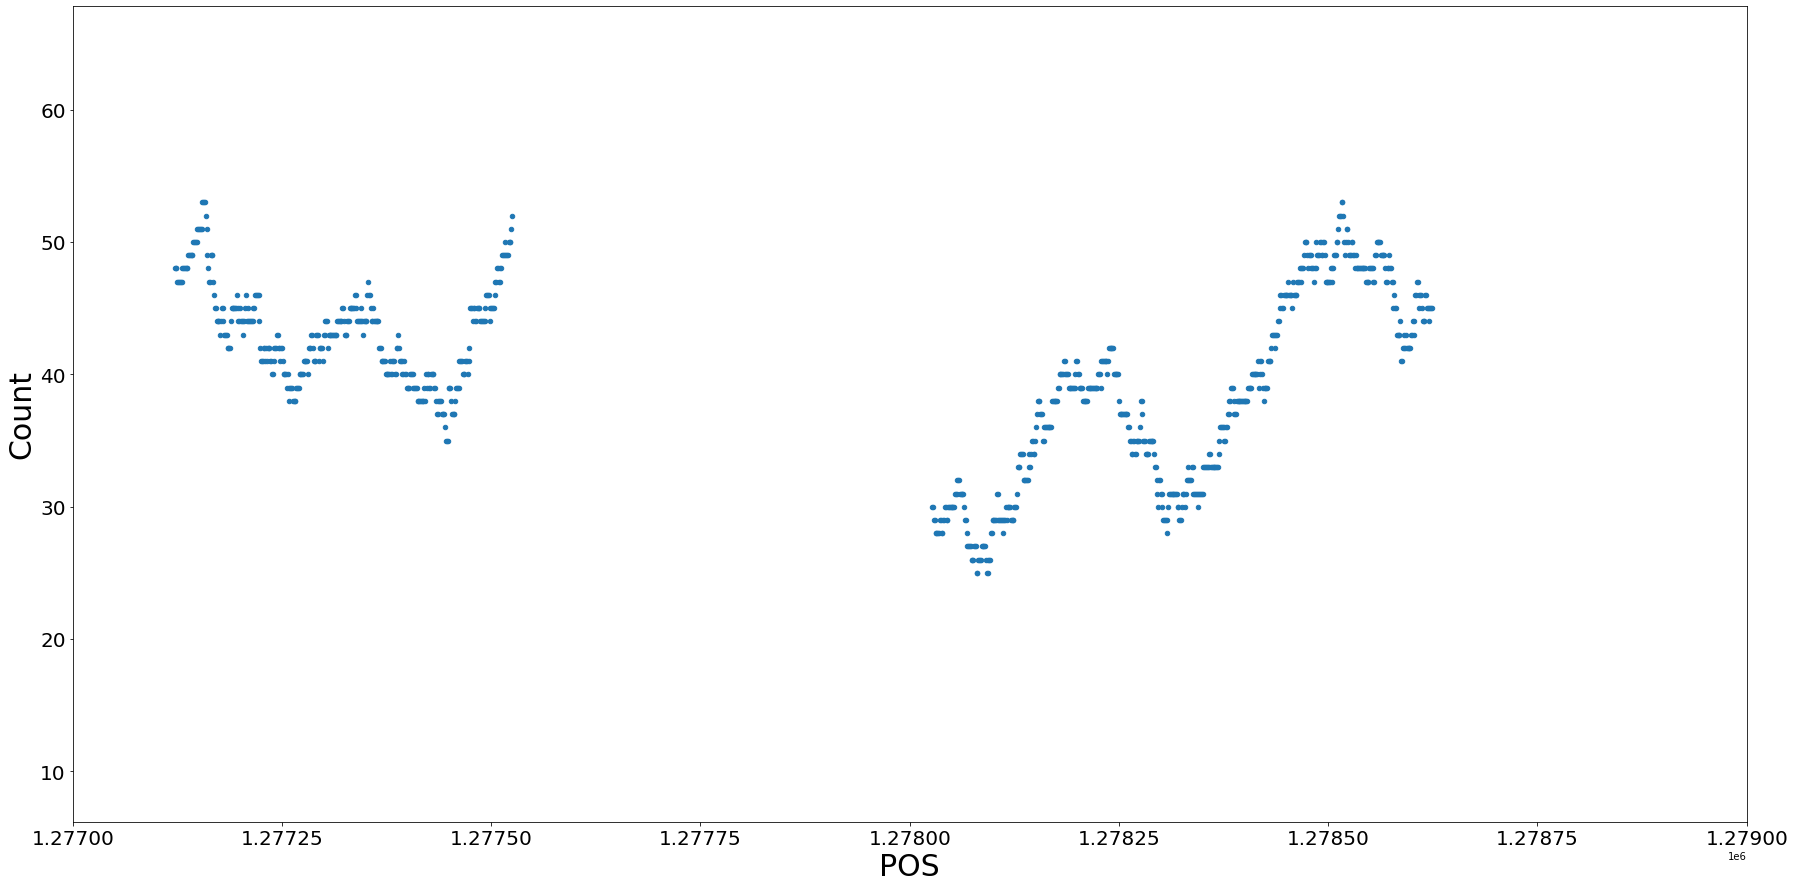

In [75]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1277000,1279000), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1277000_1279000.png')

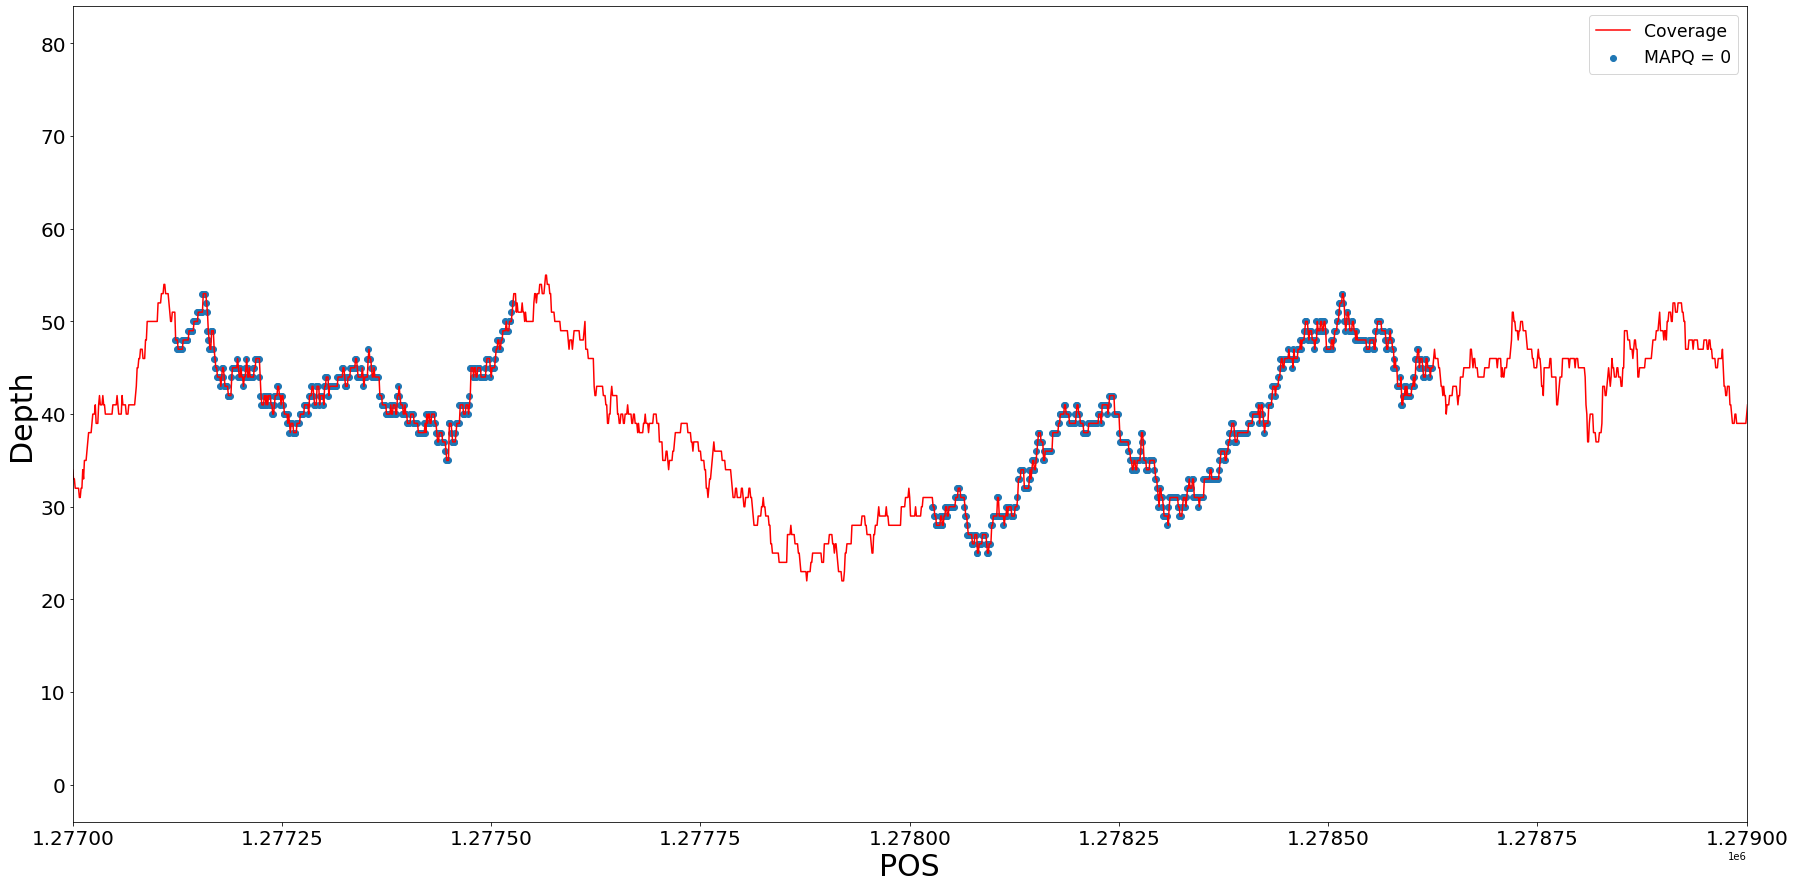

In [124]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1277000,1279000)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1277000_1279000.png')

In [76]:
ref0[ref0.start > 1279000]

chr    start      end min_mapq max_mapq median_mapq  \
1341481  NC_000962.3  1341481  1341482        0        0           0   
1341482  NC_000962.3  1341482  1341483        0        0           0   
1341483  NC_000962.3  1341483  1341484        0        0           0   
1341484  NC_000962.3  1341484  1341485        0        0           0   
1341485  NC_000962.3  1341485  1341486        0        0           0   
...              ...      ...      ...      ...      ...         ...   
4319164  NC_000962.3  4319164  4319165        0        0         0.0   
4319165  NC_000962.3  4319165  4319166        0        0         0.0   
4319166  NC_000962.3  4319166  4319167        0        0         0.0   
4319167  NC_000962.3  4319167  4319168        0        0         0.0   
4319168  NC_000962.3  4319168  4319169        0        0         0.0   

         count_mapq  
1341481          57  
1341482          57  
1341483          58  
1341484          58  
1341485          59  
...             ...  
4319164          36  
4319165          37  
4319166          38  
4319167          38  
4319168          38  

[33678 rows x 7 columns]

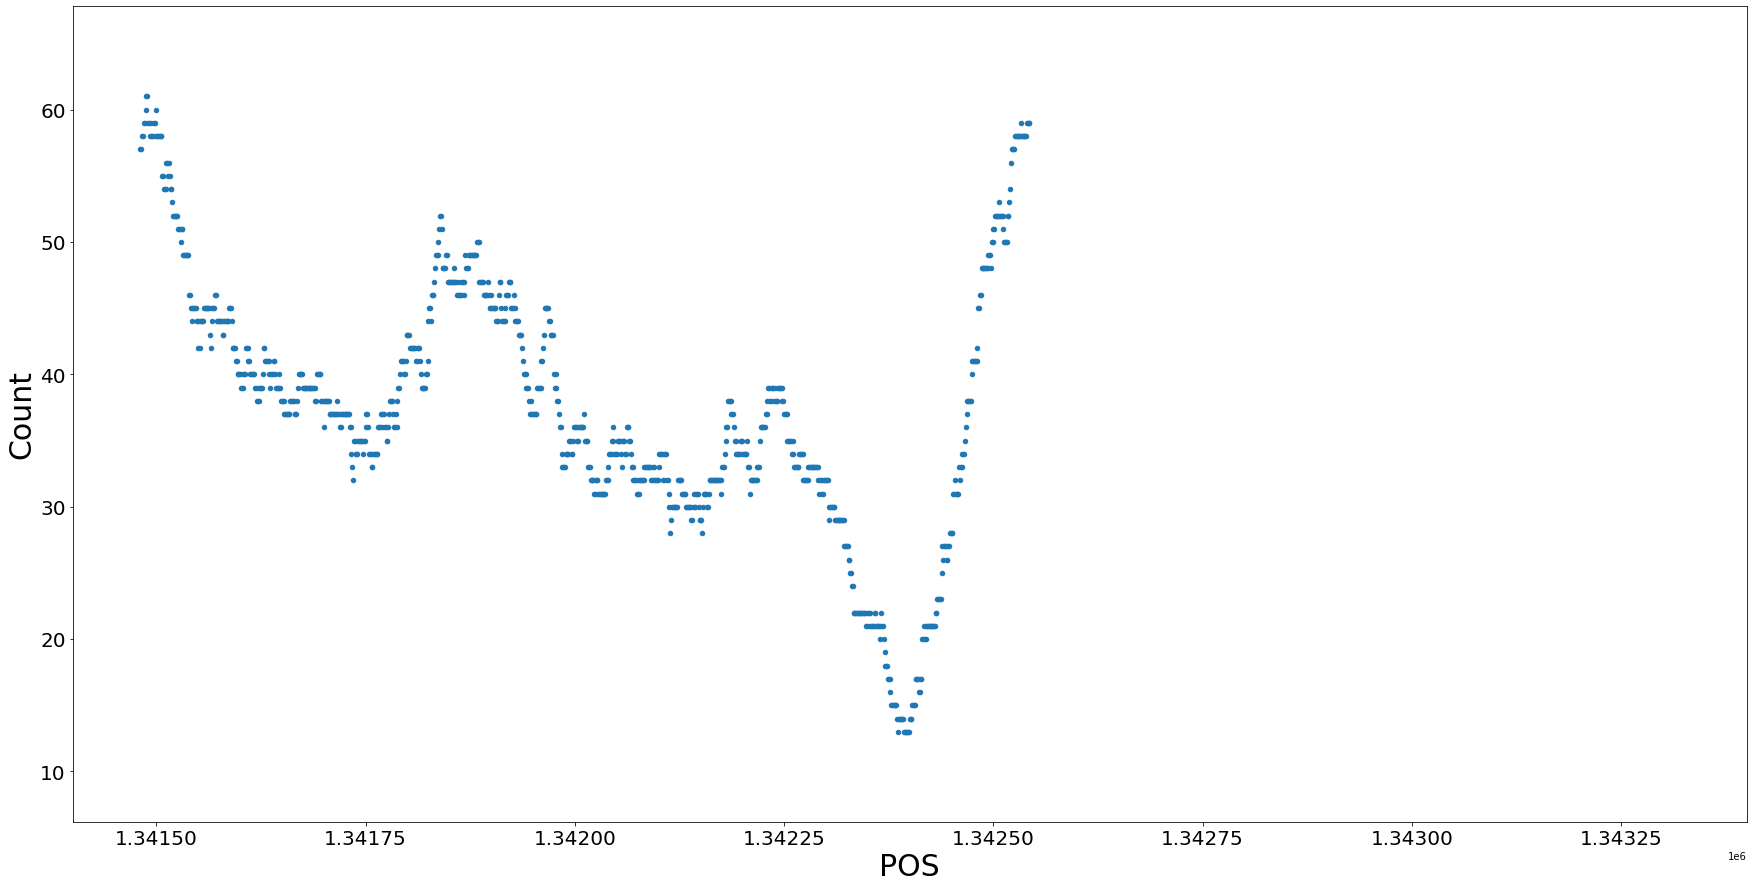

In [78]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1341400,1343400), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1341400_1343400.png')

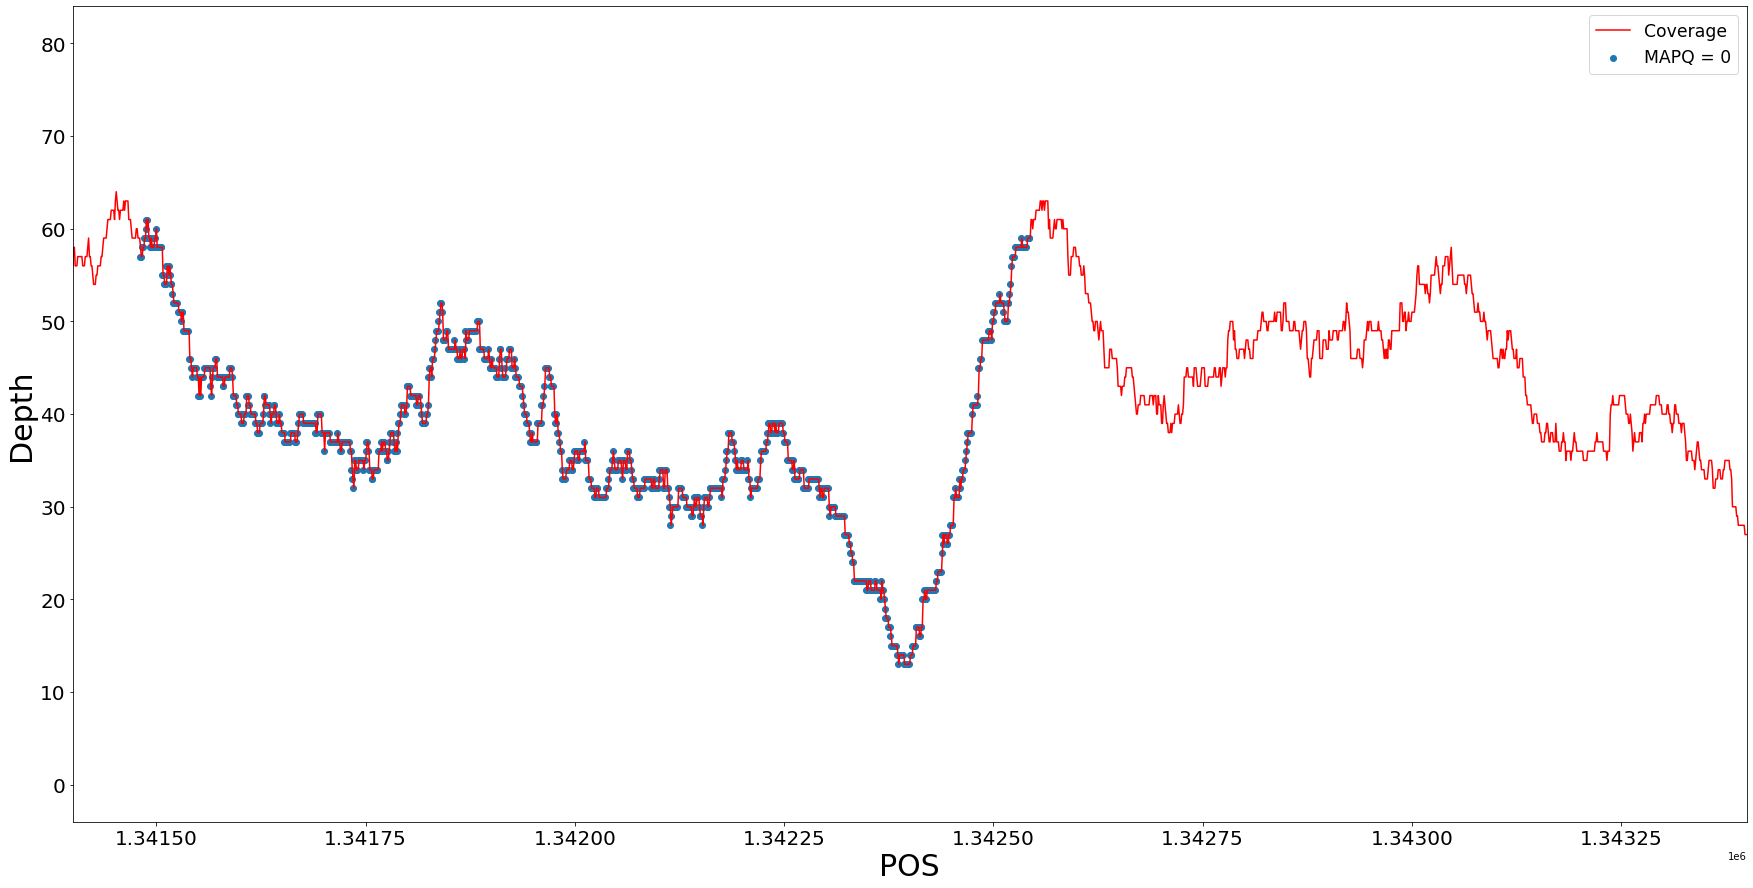

In [125]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1341400,1343400)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1341400_1343400.png')

### Plot MAPQ - H37Rv mapped to H37Rv
#### With ```.sam``` files

In [85]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed.sam', 'r') as samfile:
    lines = samfile.readlines()
data = lines[2:]

In [86]:
pos_values = []
mapq_values = []

for read in data:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

In [87]:
d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap = pd.DataFrame(data=d)

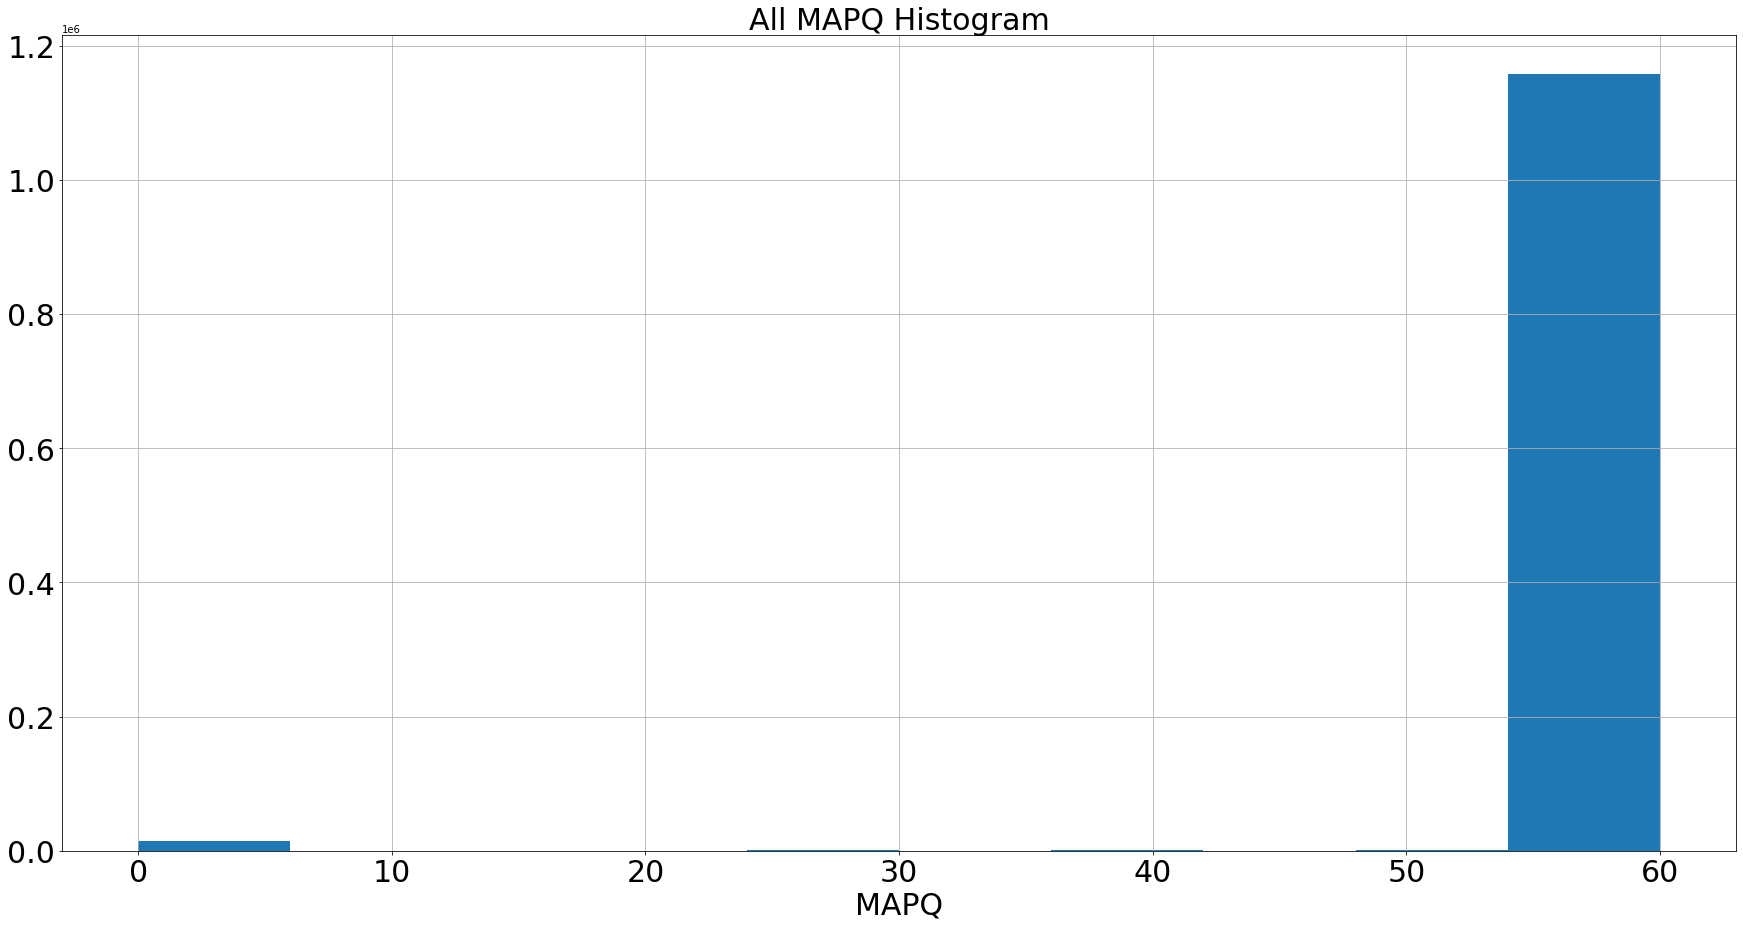

In [88]:
samposmap.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)
plt.savefig('refmapq_all.png')

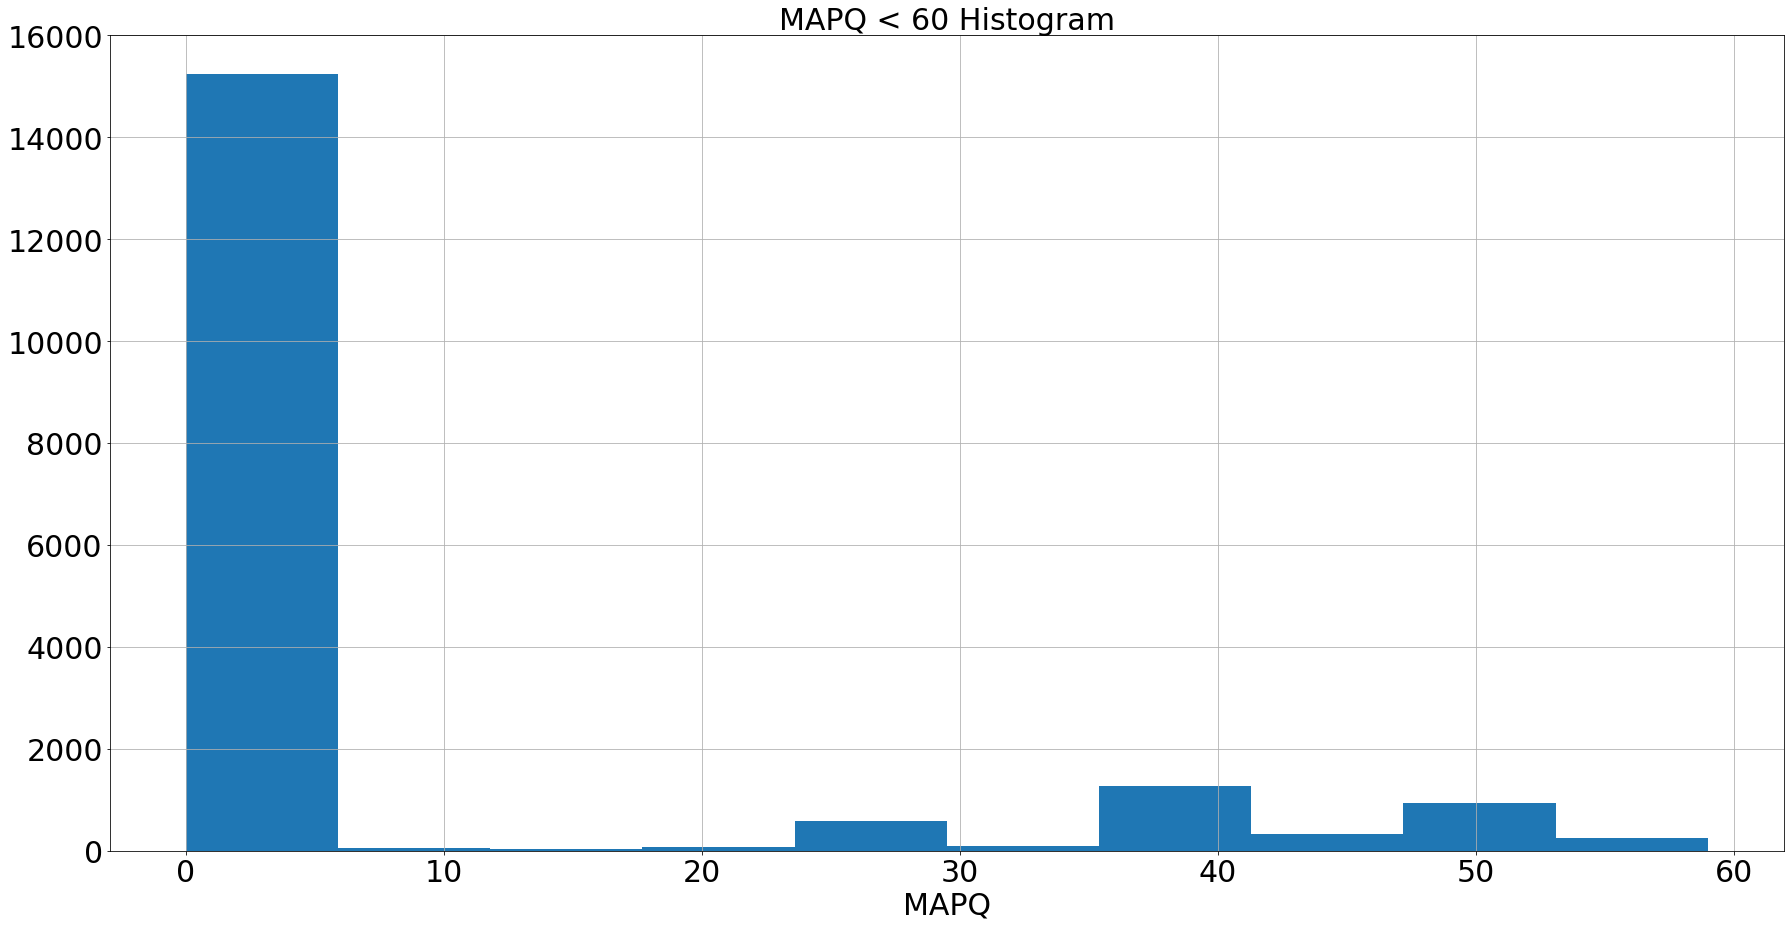

In [89]:
samposmap[samposmap['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)
plt.savefig('refmapq_under60.png')

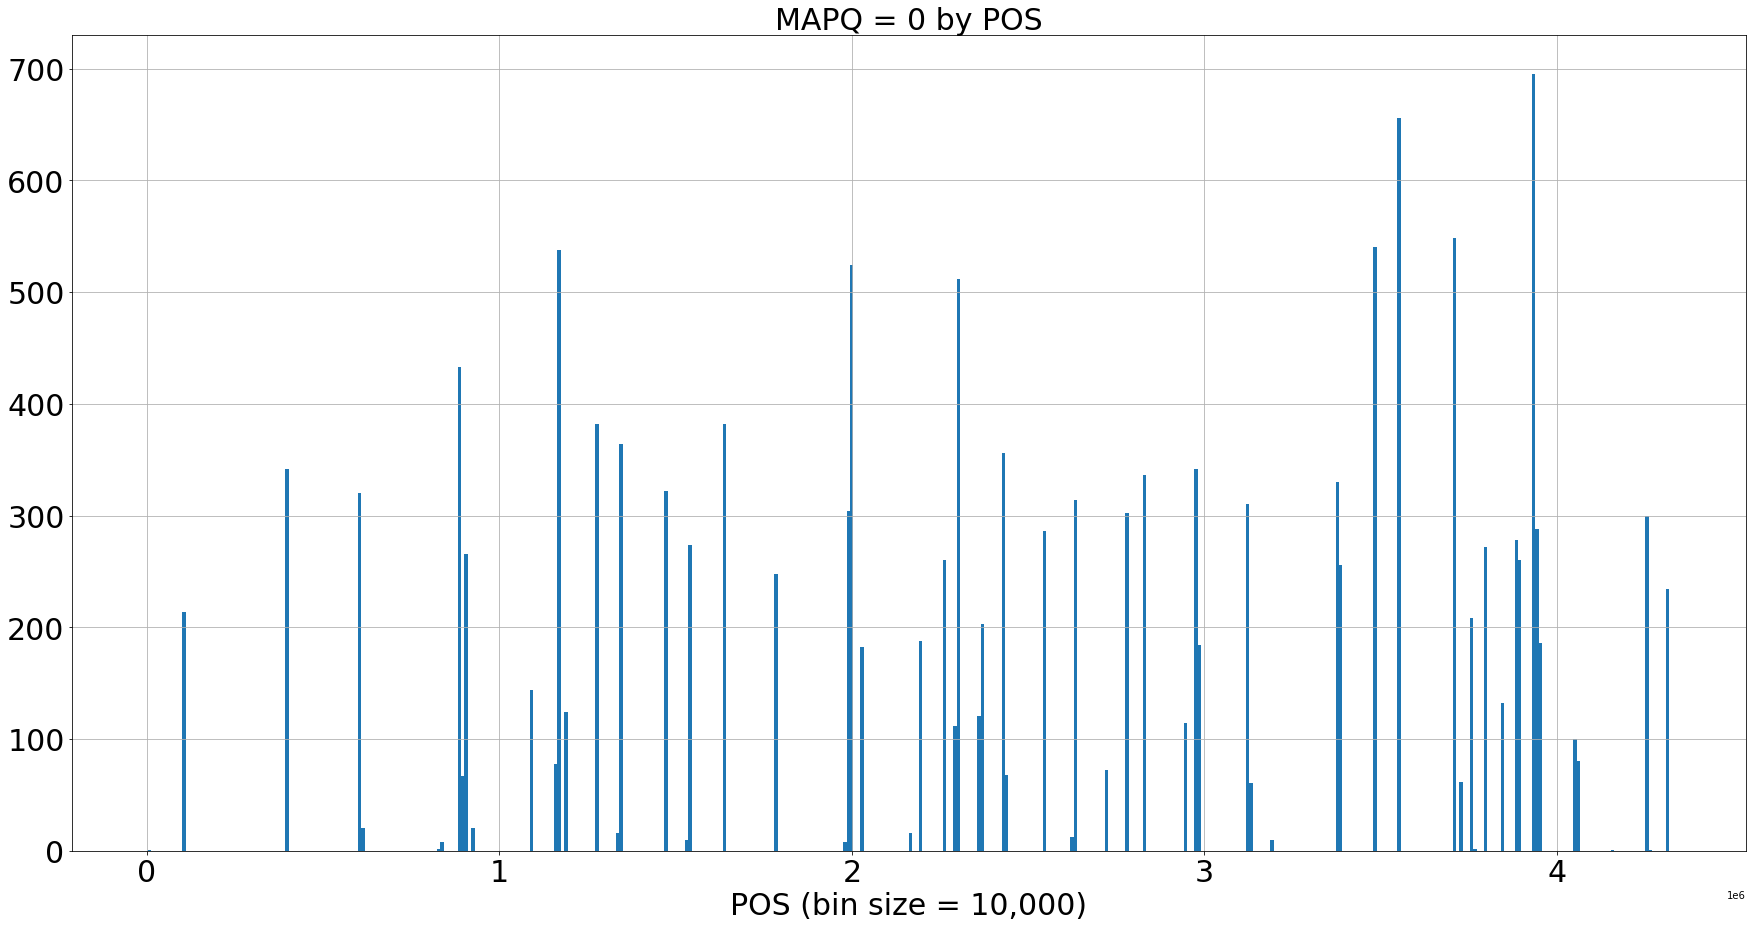

In [91]:
samposmap[samposmap['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)
plt.savefig('refmapq_0.png')

### Plot MAPQ - 20,000 SNPs mapped to H37Rv

In [92]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed.sam', 'r') as samfile_20ksnps:
    lines = samfile_20ksnps.readlines()
data_20ksnps = lines[2:]
pos_values = []
mapq_values = []

for read in data_20ksnps:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap_20ksnps = pd.DataFrame(data=d)

Text(0.5, 0, 'MAPQ')

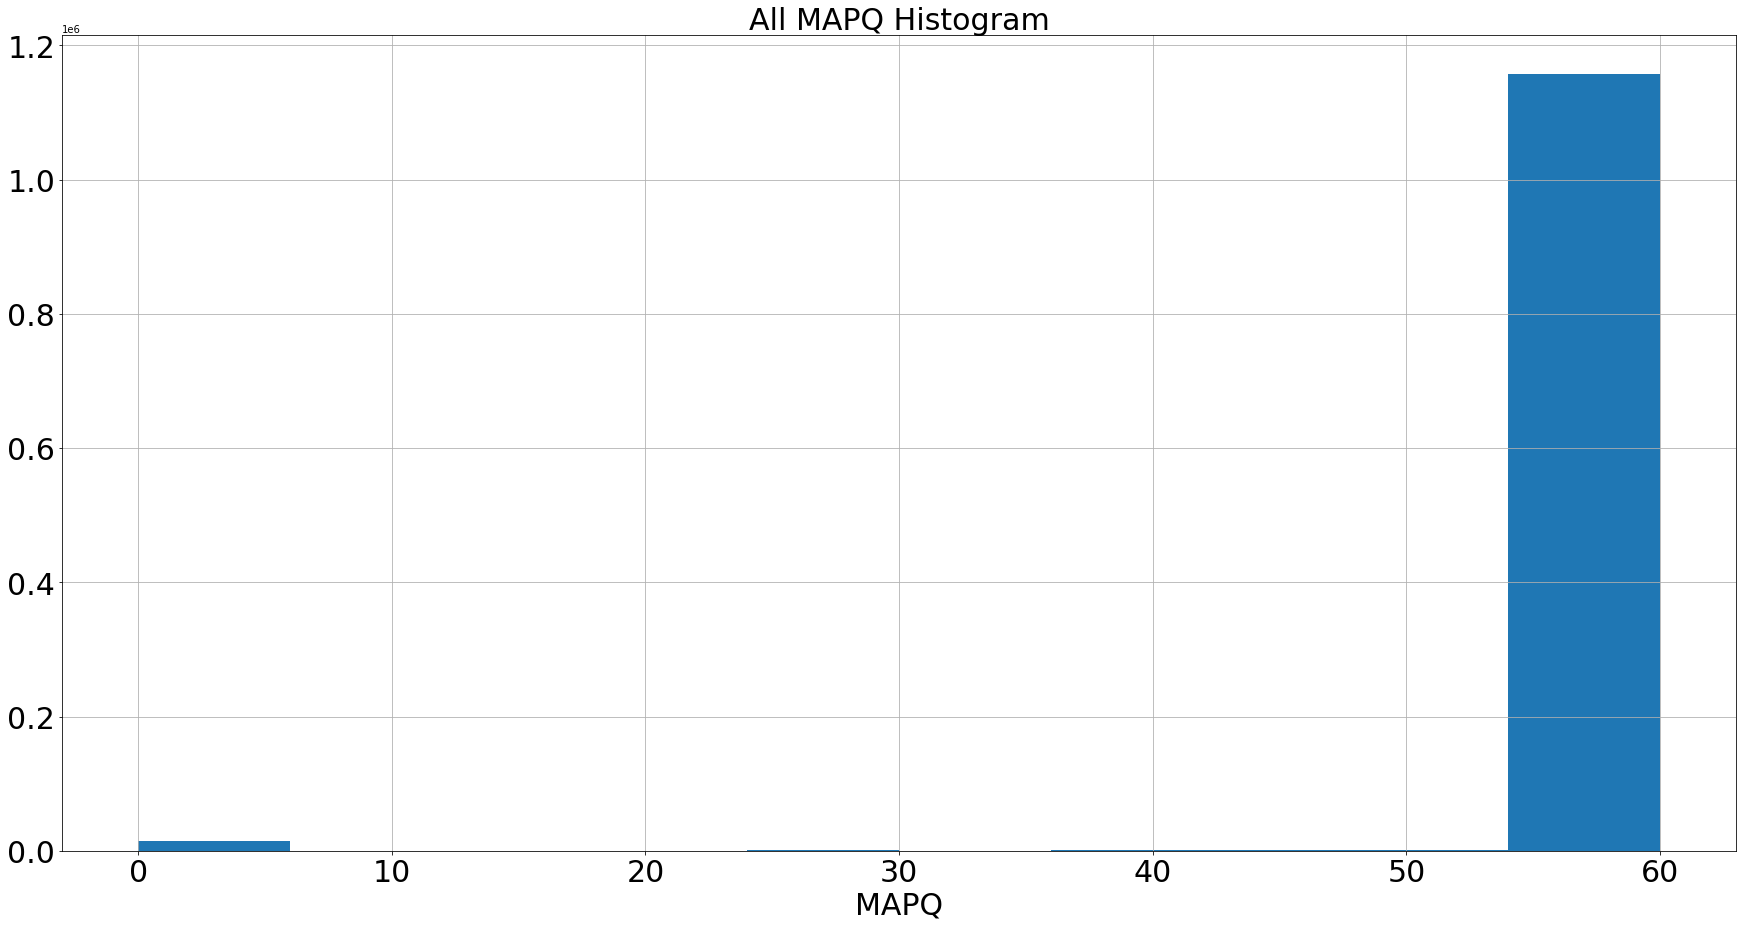

In [97]:
samposmap_20ksnps.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'MAPQ')

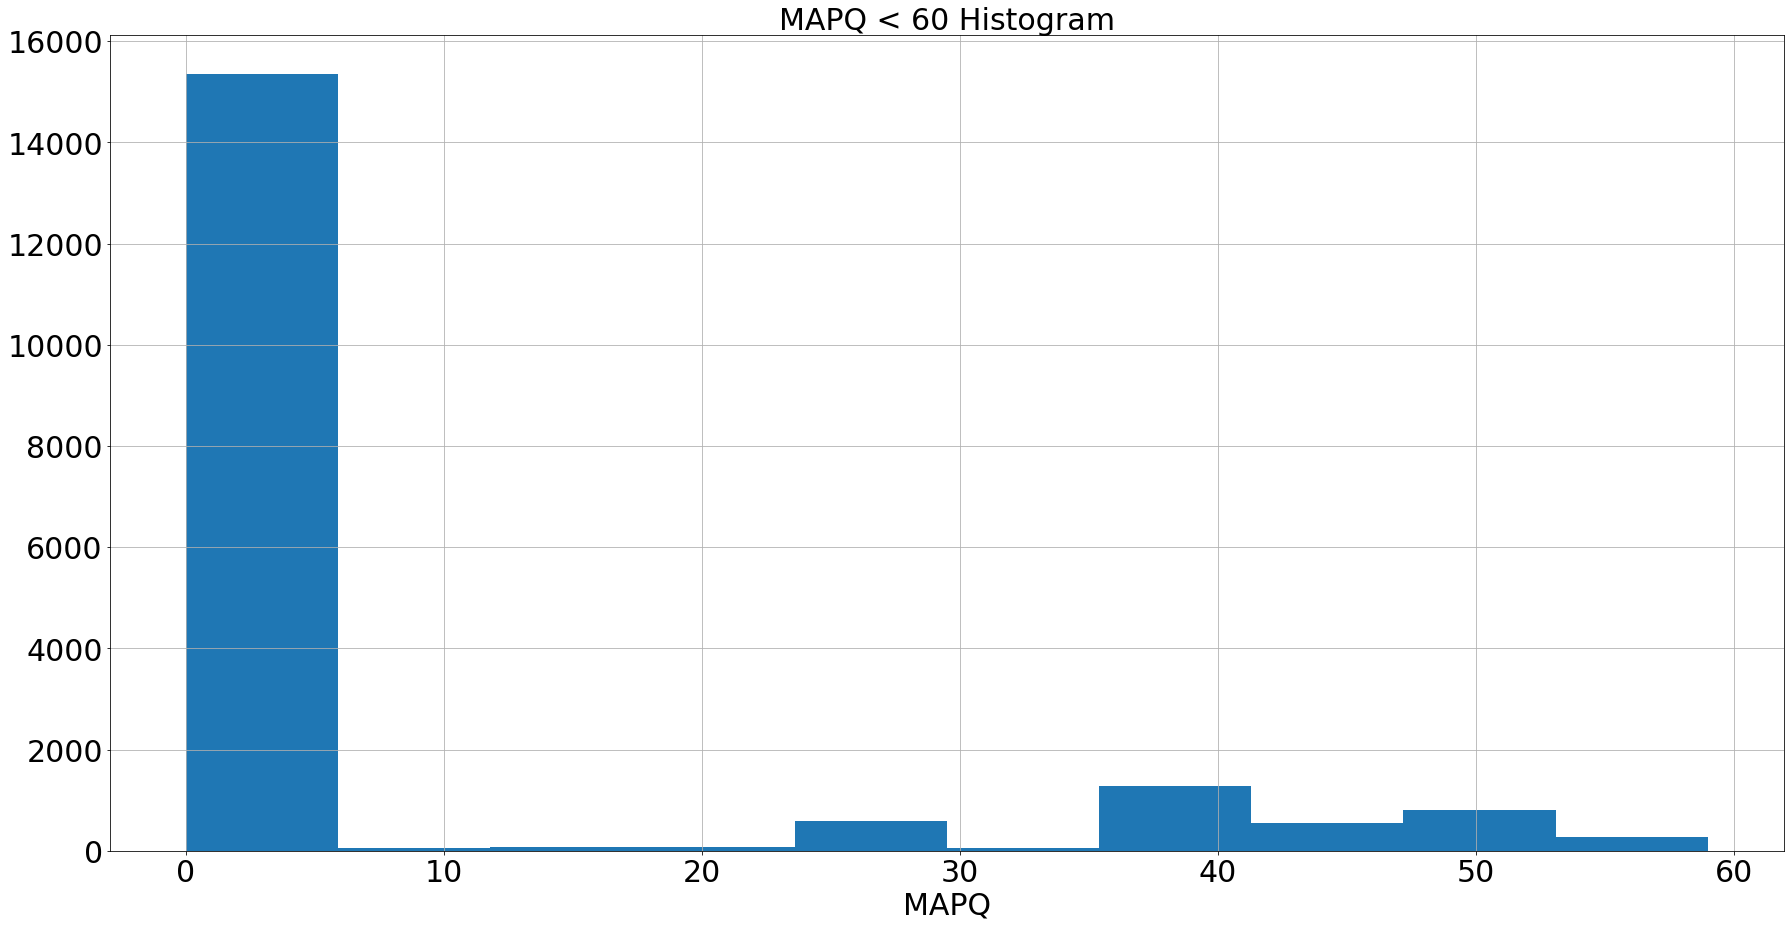

In [100]:
samposmap_20ksnps[samposmap_20ksnps['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'POS (bin size = 10,000)')

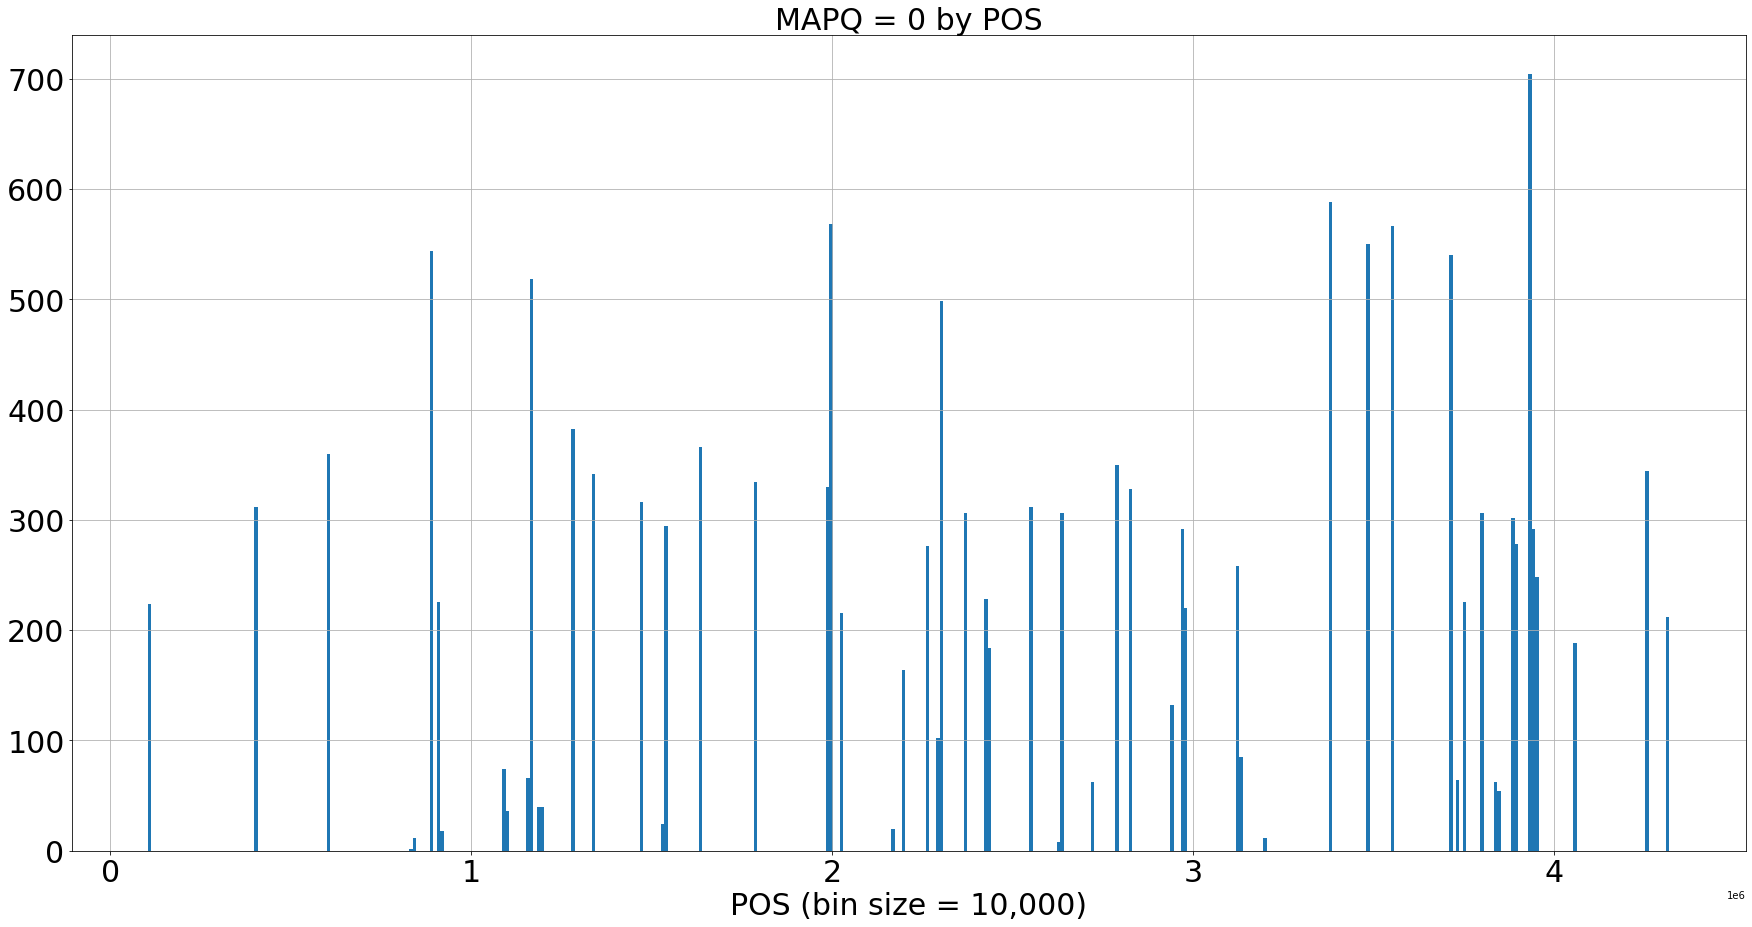

In [106]:
samposmap_20ksnps[samposmap_20ksnps['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)

### Plot MAPQ - 1048 SNPs + 3317 indels (1:3 SNPs:indels) mapped to H37Rv

In [78]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBVAR1-pe-trimmed.sam', 'r') as samfile_mtbvar1:
    lines = samfile_mtbvar1.readlines()
data_mtbvar1 = lines[2:]
pos_values = []
mapq_values = []

for read in data_mtbvar1:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap_mtbvar1 = pd.DataFrame(data=d)

Text(0.5, 0, 'MAPQ')

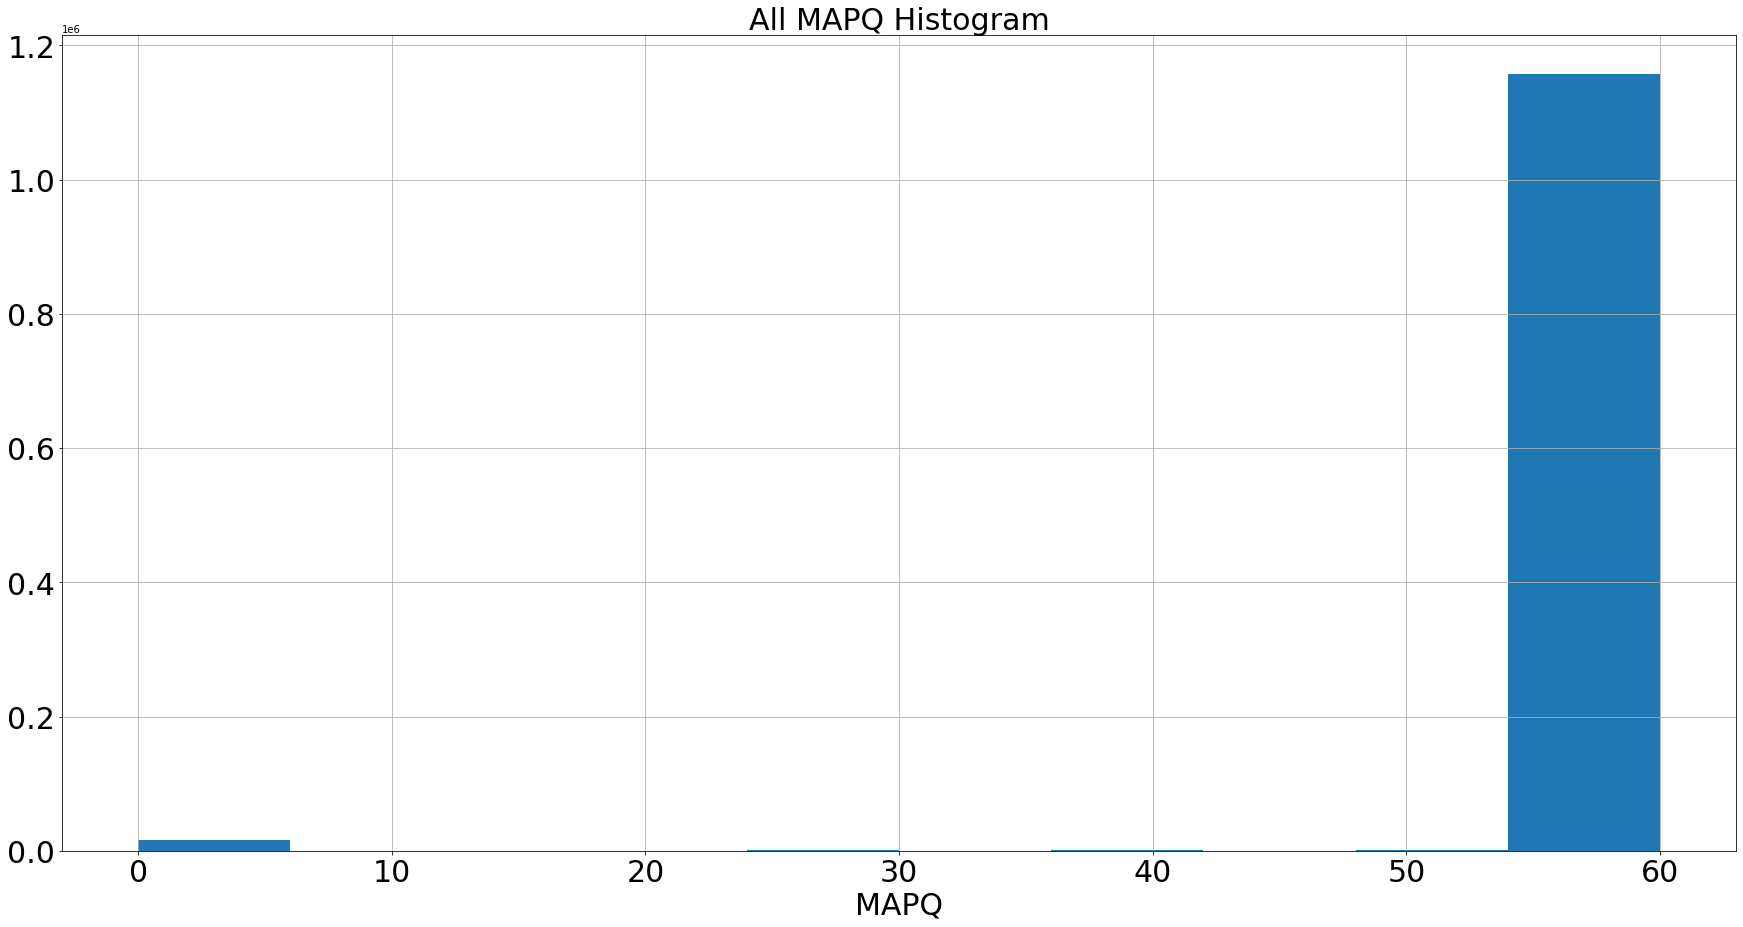

In [98]:
samposmap_mtbvar1.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'MAPQ')

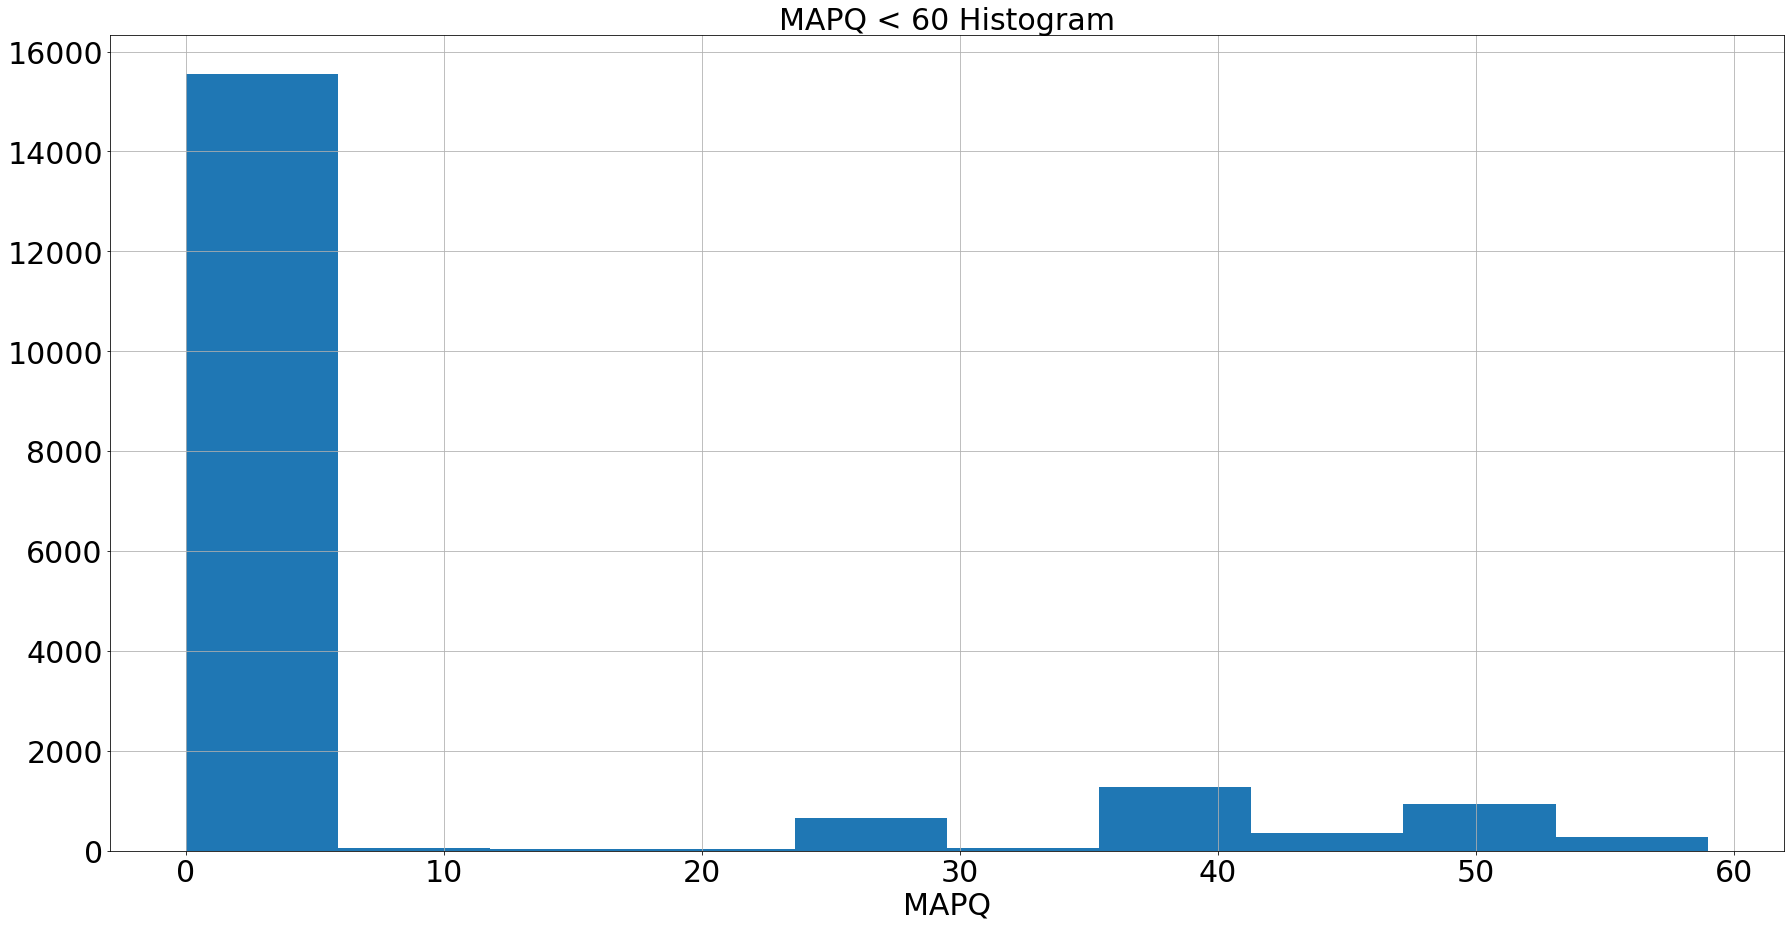

In [99]:
samposmap_mtbvar1[samposmap_mtbvar1['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'POS (bin size = 10,000)')

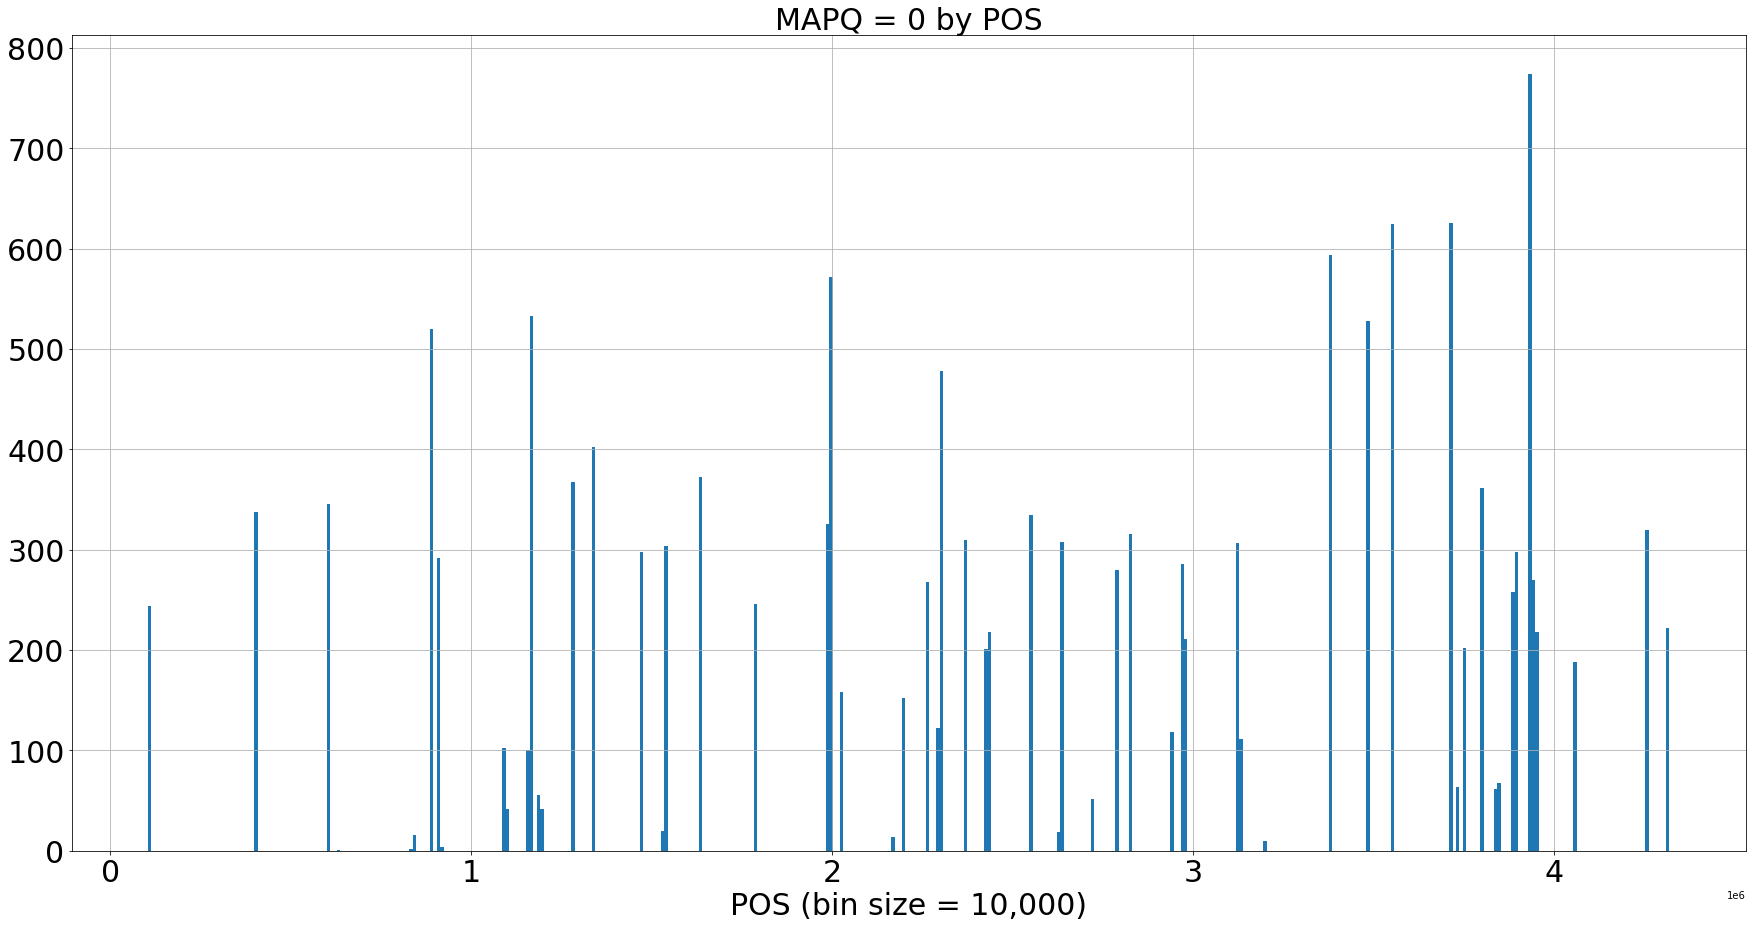

In [107]:
samposmap_mtbvar1[samposmap_mtbvar1['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)